In [17]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.options.mode.chained_assignment = None  # default='warn'
import os
from modules.TravelSurveyAnalysis import TravelSurveyAnalysis

if 'TravelSurvey' in os.getcwd():
    data_folder = '../../data/'
elif 'data_analysis' in os.getcwd():
    data_folder = '../data/'
else:
    data_folder = './data/'

source_folder_path = data_folder + 'OD/OD_2017/'
destination_folder_path = data_folder + 'OD/OD_2017/'

In [18]:
expansion_factor_trip = 'FE_VIA'
expansion_factor_person = 'FE_PESS'

tsa = TravelSurveyAnalysis(source_folder_path, destination_folder_path,
                           expansion_factor_trip, expansion_factor_person, '', '')

In [19]:
filename = 'OD_2017_v1.csv'

data = tsa.read_data(filename)

In [20]:
data

,ZONA,MUNI_DOM,CO_DOM_X,CO_DOM_Y,ID_DOM,F_DOM,FE_DOM,DOM,CD_ENTRE,DATA,TIPO_DOM,AGUA,RUA_PAVI,NO_MORAD,TOT_FAM,ID_FAM,F_FAM,FE_FAM,FAMILIA,NO_MORAF,CONDMORA,QT_BANHO,QT_EMPRE,QT_AUTO,QT_MICRO,QT_LAVALOU,QT_GEL1,QT_GEL2,QT_FREEZ,QT_MLAVA,QT_DVD,QT_MICROON,QT_MOTO,QT_SECAROU,QT_BICICLE,NAO_DCL_IT,CRITERIOBR,PONTO_BR,ANO_AUTO1,ANO_AUTO2,ANO_AUTO3,RENDA_FA,CD_RENFA,ID_PESS,F_PESS,FE_PESS,PESSOA,SIT_FAM,IDADE,SEXO,ESTUDA,GRAU_INS,CD_ATIVI,CO_REN_I,VL_REN_I,ZONA_ESC,MUNIESC,CO_ESC_X,CO_ESC_Y,TIPO_ESC,ZONATRA1,MUNITRA1,CO_TR1_X,CO_TR1_Y,TRAB1_RE,TRABEXT1,OCUP1,SETOR1,VINC1,ZONATRA2,MUNITRA2,CO_TR2_X,CO_TR2_Y,TRAB2_RE,TRABEXT2,OCUP2,SETOR2,VINC2,N_VIAG,FE_VIA,DIA_SEM,TOT_VIAG,ZONA_O,MUNI_O,CO_O_X,CO_O_Y,ZONA_D,MUNI_D,CO_D_X,CO_D_Y,ZONA_T1,MUNI_T1,CO_T1_X,CO_T1_Y,ZONA_T2,MUNI_T2,CO_T2_X,CO_T2_Y,ZONA_T3,MUNI_T3,CO_T3_X,CO_T3_Y,MOTIVO_O,MOTIVO_D,MOT_SRES,SERVIR_O,SERVIR_D,MODO1,MODO2,MODO3,MODO4,H_SAIDA,MIN_SAIDA,ANDA_O,H_CHEG,MIN_CHEG,ANDA_D,DURACAO,MODOPRIN,TIPVG,PAG_VIAG,TP_ESAUTO,VL_EST,PE_BICI,VIA_BICI,TP_ESBICI,DISTANCIA,ID_ORDEM
0,1,36,333743,7394463,10001,1,15.416667,1,1,6092017,1,1,1,2,1,100011,1,15.416667,1,2,2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1,4.0,25.0,NaN,NaN,NaN,2732.58,3,10001101,1,19.532274,1,1,59,2,1,3,1,3,NaN,NaN,NaN,NaN,NaN,NaN,3.0,36.0,333104.0,7394476.0,2.0,2.0,4.0,13.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,22.132647,3.0,2,1.0,36.0,333743.0,7394463.0,3.0,36.0,333104.0,7394476.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,3.0,3.0,2.0,2.0,16.0,NaN,NaN,NaN,5.0,45.0,NaN,5.0,55.0,NaN,10.0,16.0,3.0,NaN,NaN,NaN,1.0,NaN,NaN,639.13,1
1,1,36,333743,7394463,10001,0,15.416667,1,1,6092017,1,1,1,2,1,100011,0,15.416667,1,2,2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1,4.0,25.0,NaN,NaN,NaN,2732.58,3,10001101,0,19.532274,1,1,59,2,1,3,1,3,NaN,NaN,NaN,NaN,NaN,NaN,3.0,36.0,333104.0,7394476.0,2.0,2.0,4.0,13.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,22.132647,3.0,2,3.0,36.0,333104.0,7394476.0,1.0,36.0,333743.0,7394463.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,8.0,3.0,2.0,2.0,16.0,NaN,NaN,NaN,15.0,45.0,NaN,15.0,55.0,NaN,10.0,16.0,3.0,NaN,NaN,NaN,1.0,NaN,NaN,639.13,2
2,1,36,333743,7394463,10001,0,15.416667,1,1,6092017,1,1,1,2,1,100011,0,15.416667,1,2,2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1,4.0,25.0,NaN,NaN,NaN,2732.58,3,10001102,1,16.663976,2,3,21,2,5,4,1,3,NaN,84.0,36.0,329431.0,7395939.0,2.0,82.0,36.0,327503.0,7392159.0,2.0,2.0,4.0,7.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,18.882487,3.0,3,1.0,36.0,333743.0,7394463.0,82.0,36.0,327503.0,7392159.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,3.0,3.0,2.0,2.0,1.0,NaN,NaN,NaN,9.0,0.0,10.0,9.0,50.0,20.0,50.0,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,6651.77,3
3,1,36,333743,7394463,10001,0,15.416667,1,1,6092017,1,1,1,2,1,100011,0,15.416667,1,2,2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1,4.0,25.0,NaN,NaN,NaN,2732.58,3,10001102,0,16.663976,2,3,21,2,5,4,1,3,NaN,84.0,36.0,329431.0,7395939.0,2.0,82.0,36.0,327503.0,7392159.0,2.0,2.0,4.0,7.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,18.882487,3.0,3,82.0,36.0,327503.0,7392159.0,84.0,36.0,329431.0,7395939.0,93.0,36.0,329861.0,7397268.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,4.0,4.0,2.0,2.0,1.0,4.0,NaN,NaN,17.0,0.0,20.0,18.0,0.0,1.0,60.0,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,4243.30,4
4,1,36,333743,7394463,10001,0,15.416667,1,1,6092017,1,1,1,2,1,100011,0,15.416667,1,2,2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1,4.0,25.0,NaN,NaN,NaN,2732.58,3,10001102,0,16.663976,2,3,21,2,5,4,1,3,NaN,84.0,36.0,329431.0,7395939.0,2.0,82.0,36.0,327503.0,7392159.0,2.0,2.0,4.0,7.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,18.882487,3.0,3,84.0,36.0,329431.0,7395939.0,1.0,36.0,333743.0,7394463.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,8.0,4.0,2.0,2.0,12.0,NaN,NaN,NaN,22.0,50.0,1.0,23.0,30.0,1.0,40.0,12.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,4557.62,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [21]:
data['FE_VIA'].sum()

42006659.869834

In [22]:
# data_sp = data[(data['MUNI_O'] == 36) | (data['MUNI_D'] == 36)]
# data_sp = data[(data['MUNI_DOM'] == 36)]

In [23]:
data_sp = data[(data['MUNI_O'] == 36) & (data['MUNI_D'] == 36)]

In [24]:
data_sp['FE_VIA'].sum()

23934151.310250998

TIPVG

1 - Coletivo
2 - Individual
3 - A pé
4 - Bicicleta

In [25]:
mode_column = 'TIPVG'
mode_index_map = {1: 'Collective motorized', 2: 'Personal motorized', 3: 'On foot', 4: 'Bicycle'}
df = tsa.calculate_distribution(data, mode_column, expansion_factor_trip, mode_index_map)
df

,FE_VIA
TIPVG_new,
Bicycle,0.897418
Collective motorized,36.408850
On foot,31.780379
Personal motorized,30.913353


In [26]:
df.values.sum()

100.0

In [27]:
tsa.calculate_distribution(data_sp, mode_column, expansion_factor_trip, mode_index_map)

,FE_VIA
TIPVG_new,
Bicycle,0.854437
Collective motorized,38.953477
On foot,32.088491
Personal motorized,28.103595


In [28]:
tsa.calculate_distribution(data_sp, mode_column, expansion_factor_trip, mode_index_map)

,FE_VIA
TIPVG_new,
Bicycle,0.854437
Collective motorized,38.953477
On foot,32.088491
Personal motorized,28.103595


In [29]:
# mode share without the expansion factor
tsa.calculate_distribution(data_sp, mode_column, False, mode_index_map)

,TIPVG_new
Personal motorized,35.798201
Collective motorized,32.144708
On foot,31.178105
Bicycle,0.878986


In [30]:
pd.options.display.float_format = '{:.0f}'.format
tsa.calculate_distribution(data_sp, mode_column, expansion_factor_trip, mode_index_map, normalize=False)

,FE_VIA
TIPVG_new,
Bicycle,204502
Collective motorized,9323184
On foot,7680108
Personal motorized,6726357


In [31]:
pd.reset_option('display.float_format')

In [32]:
data_sp[mode_column].value_counts(normalize=True)

2.0    0.357982
1.0    0.321447
3.0    0.311781
4.0    0.008790
Name: TIPVG, dtype: float64

In [33]:
# with trip expansion factor
gender_column = 'SEXO'
gender_index_map = {1: 'Man', 2: 'Woman'}
df = tsa.calculate_distribution(data_sp, gender_column, expansion_factor_trip, gender_index_map)
df

,FE_VIA
SEXO_new,
Man,48.747309
Woman,51.252691


In [34]:
# with person expansion factor
df = tsa.calculate_distribution(data_sp, gender_column, expansion_factor_person, gender_index_map)
df

,FE_PESS
SEXO_new,
Man,48.784295
Woman,51.215705


In [35]:
bike_trips = tsa.get_specific_mode_trips(data_sp, mode_column, [4])
bike_trips

,ZONA,MUNI_DOM,CO_DOM_X,CO_DOM_Y,ID_DOM,F_DOM,FE_DOM,DOM,CD_ENTRE,DATA,TIPO_DOM,AGUA,RUA_PAVI,NO_MORAD,TOT_FAM,ID_FAM,F_FAM,FE_FAM,FAMILIA,NO_MORAF,CONDMORA,QT_BANHO,QT_EMPRE,QT_AUTO,QT_MICRO,QT_LAVALOU,QT_GEL1,QT_GEL2,QT_FREEZ,QT_MLAVA,QT_DVD,QT_MICROON,QT_MOTO,QT_SECAROU,QT_BICICLE,NAO_DCL_IT,CRITERIOBR,PONTO_BR,ANO_AUTO1,ANO_AUTO2,ANO_AUTO3,RENDA_FA,CD_RENFA,ID_PESS,F_PESS,FE_PESS,PESSOA,SIT_FAM,IDADE,SEXO,ESTUDA,GRAU_INS,CD_ATIVI,CO_REN_I,VL_REN_I,ZONA_ESC,MUNIESC,CO_ESC_X,CO_ESC_Y,TIPO_ESC,ZONATRA1,MUNITRA1,CO_TR1_X,CO_TR1_Y,TRAB1_RE,TRABEXT1,OCUP1,SETOR1,VINC1,ZONATRA2,MUNITRA2,CO_TR2_X,CO_TR2_Y,TRAB2_RE,TRABEXT2,OCUP2,SETOR2,VINC2,N_VIAG,FE_VIA,DIA_SEM,TOT_VIAG,ZONA_O,MUNI_O,CO_O_X,CO_O_Y,ZONA_D,MUNI_D,CO_D_X,CO_D_Y,ZONA_T1,MUNI_T1,CO_T1_X,CO_T1_Y,ZONA_T2,MUNI_T2,CO_T2_X,CO_T2_Y,ZONA_T3,MUNI_T3,CO_T3_X,CO_T3_Y,MOTIVO_O,MOTIVO_D,MOT_SRES,SERVIR_O,SERVIR_D,MODO1,MODO2,MODO3,MODO4,H_SAIDA,MIN_SAIDA,ANDA_O,H_CHEG,MIN_CHEG,ANDA_D,DURACAO,MODOPRIN,TIPVG,PAG_VIAG,TP_ESAUTO,VL_EST,PE_BICI,VIA_BICI,TP_ESBICI,DISTANCIA,ID_ORDEM,TIPVG_new,SEXO_new
449,2,36,333638,7394792,20877,1,68.750000,877,1,2082018,1,1,1,5,1,208771,1,68.750000,1,5,2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,1,5.0,20.0,NaN,NaN,NaN,1908.00,1,20877101,1,27.983193,1,1,71,1,1,2,4,1,954.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,45.993065,4.0,8,2.0,36.0,333638.0,7394792.0,20.0,36.0,333510.0,7393212.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,4.0,4.0,2.0,1.0,15.0,NaN,NaN,NaN,8.0,0.0,1.0,8.0,10.0,1.0,10.0,15.0,4.0,NaN,NaN,NaN,1.0,2.0,8.0,1585.18,450,Bicycle,Man
450,2,36,333638,7394792,20877,0,68.750000,877,1,2082018,1,1,1,5,1,208771,0,68.750000,1,5,2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,1,5.0,20.0,NaN,NaN,NaN,1908.00,1,20877101,0,27.983193,1,1,71,1,1,2,4,1,954.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,45.993065,4.0,8,20.0,36.0,333510.0,7393212.0,2.0,36.0,333638.0,7394792.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,8.0,4.0,1.0,2.0,15.0,NaN,NaN,NaN,8.0,10.0,1.0,8.0,20.0,1.0,10.0,15.0,4.0,NaN,NaN,NaN,1.0,2.0,3.0,1585.18,451,Bicycle,Man
451,2,36,333638,7394792,20877,0,68.750000,877,1,2082018,1,1,1,5,1,208771,0,68.750000,1,5,2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,1,5.0,20.0,NaN,NaN,NaN,1908.00,1,20877101,0,27.983193,1,1,71,1,1,2,4,1,954.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,45.993065,4.0,8,2.0,36.0,333638.0,7394792.0,20.0,36.0,333510.0,7393212.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,4.0,4.0,2.0,1.0,15.0,NaN,NaN,NaN,10.0,50.0,1.0,11.0,0.0,1.0,10.0,15.0,4.0,NaN,NaN,NaN,1.0,2.0,8.0,1585.18,452,Bicycle,Man
452,2,36,333638,7394792,20877,0,68.750000,877,1,2082018,1,1,1,5,1,208771,0,68.750000,1,5,2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,1,5.0,20.0,NaN,NaN,NaN,1908.00,1,20877101,0,27.983193,1,1,71,1,1,2,4,1,954.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,45.993065,4.0,8,20.0,36.0,333510.0,7393212.0,2.0,36.0,333638.0,7394792.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,8.0,4.0,1.0,2.0,15.0,NaN,NaN,NaN,11.0,0.0,1.0,11.0,10.0,1.0,10.0,15.0,4.0,NaN,NaN,NaN,1.0,2.0,3.0,1585.18,453,Bicycle,Man
453,2,36,333638,7394792,20877,0,68.750000,877,1,2082018,1,1,1,5,1,208771,0,68.750000,1,5,2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,1,5.0,20.0,NaN,NaN,NaN,1908.00,1,20877101,0,27.983193,1,1,71,1,1,2,4,1,954.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,45.993065,4.0,8,2.0,36.0,333638.0,7394792.0,3.0,36.0,333759.0,7394160.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,4.0,4.0,2.0,1.0,15.0,NaN,NaN,NaN,13.0,20.0,1.0,13.0,30.0,1.0,10.0,15.0,4.0,NaN,NaN,NaN,1.0,2.0,8.0,643.48,454,Bicycle,Man
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [36]:
bike_trips = tsa.get_specific_mode_trips(data_sp, mode_column, [4])
bike_trips

,ZONA,MUNI_DOM,CO_DOM_X,CO_DOM_Y,ID_DOM,F_DOM,FE_DOM,DOM,CD_ENTRE,DATA,TIPO_DOM,AGUA,RUA_PAVI,NO_MORAD,TOT_FAM,ID_FAM,F_FAM,FE_FAM,FAMILIA,NO_MORAF,CONDMORA,QT_BANHO,QT_EMPRE,QT_AUTO,QT_MICRO,QT_LAVALOU,QT_GEL1,QT_GEL2,QT_FREEZ,QT_MLAVA,QT_DVD,QT_MICROON,QT_MOTO,QT_SECAROU,QT_BICICLE,NAO_DCL_IT,CRITERIOBR,PONTO_BR,ANO_AUTO1,ANO_AUTO2,ANO_AUTO3,RENDA_FA,CD_RENFA,ID_PESS,F_PESS,FE_PESS,PESSOA,SIT_FAM,IDADE,SEXO,ESTUDA,GRAU_INS,CD_ATIVI,CO_REN_I,VL_REN_I,ZONA_ESC,MUNIESC,CO_ESC_X,CO_ESC_Y,TIPO_ESC,ZONATRA1,MUNITRA1,CO_TR1_X,CO_TR1_Y,TRAB1_RE,TRABEXT1,OCUP1,SETOR1,VINC1,ZONATRA2,MUNITRA2,CO_TR2_X,CO_TR2_Y,TRAB2_RE,TRABEXT2,OCUP2,SETOR2,VINC2,N_VIAG,FE_VIA,DIA_SEM,TOT_VIAG,ZONA_O,MUNI_O,CO_O_X,CO_O_Y,ZONA_D,MUNI_D,CO_D_X,CO_D_Y,ZONA_T1,MUNI_T1,CO_T1_X,CO_T1_Y,ZONA_T2,MUNI_T2,CO_T2_X,CO_T2_Y,ZONA_T3,MUNI_T3,CO_T3_X,CO_T3_Y,MOTIVO_O,MOTIVO_D,MOT_SRES,SERVIR_O,SERVIR_D,MODO1,MODO2,MODO3,MODO4,H_SAIDA,MIN_SAIDA,ANDA_O,H_CHEG,MIN_CHEG,ANDA_D,DURACAO,MODOPRIN,TIPVG,PAG_VIAG,TP_ESAUTO,VL_EST,PE_BICI,VIA_BICI,TP_ESBICI,DISTANCIA,ID_ORDEM,TIPVG_new,SEXO_new
449,2,36,333638,7394792,20877,1,68.750000,877,1,2082018,1,1,1,5,1,208771,1,68.750000,1,5,2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,1,5.0,20.0,NaN,NaN,NaN,1908.00,1,20877101,1,27.983193,1,1,71,1,1,2,4,1,954.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,45.993065,4.0,8,2.0,36.0,333638.0,7394792.0,20.0,36.0,333510.0,7393212.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,4.0,4.0,2.0,1.0,15.0,NaN,NaN,NaN,8.0,0.0,1.0,8.0,10.0,1.0,10.0,15.0,4.0,NaN,NaN,NaN,1.0,2.0,8.0,1585.18,450,Bicycle,Man
450,2,36,333638,7394792,20877,0,68.750000,877,1,2082018,1,1,1,5,1,208771,0,68.750000,1,5,2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,1,5.0,20.0,NaN,NaN,NaN,1908.00,1,20877101,0,27.983193,1,1,71,1,1,2,4,1,954.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,45.993065,4.0,8,20.0,36.0,333510.0,7393212.0,2.0,36.0,333638.0,7394792.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,8.0,4.0,1.0,2.0,15.0,NaN,NaN,NaN,8.0,10.0,1.0,8.0,20.0,1.0,10.0,15.0,4.0,NaN,NaN,NaN,1.0,2.0,3.0,1585.18,451,Bicycle,Man
451,2,36,333638,7394792,20877,0,68.750000,877,1,2082018,1,1,1,5,1,208771,0,68.750000,1,5,2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,1,5.0,20.0,NaN,NaN,NaN,1908.00,1,20877101,0,27.983193,1,1,71,1,1,2,4,1,954.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,45.993065,4.0,8,2.0,36.0,333638.0,7394792.0,20.0,36.0,333510.0,7393212.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,4.0,4.0,2.0,1.0,15.0,NaN,NaN,NaN,10.0,50.0,1.0,11.0,0.0,1.0,10.0,15.0,4.0,NaN,NaN,NaN,1.0,2.0,8.0,1585.18,452,Bicycle,Man
452,2,36,333638,7394792,20877,0,68.750000,877,1,2082018,1,1,1,5,1,208771,0,68.750000,1,5,2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,1,5.0,20.0,NaN,NaN,NaN,1908.00,1,20877101,0,27.983193,1,1,71,1,1,2,4,1,954.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,45.993065,4.0,8,20.0,36.0,333510.0,7393212.0,2.0,36.0,333638.0,7394792.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,8.0,4.0,1.0,2.0,15.0,NaN,NaN,NaN,11.0,0.0,1.0,11.0,10.0,1.0,10.0,15.0,4.0,NaN,NaN,NaN,1.0,2.0,3.0,1585.18,453,Bicycle,Man
453,2,36,333638,7394792,20877,0,68.750000,877,1,2082018,1,1,1,5,1,208771,0,68.750000,1,5,2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,1,5.0,20.0,NaN,NaN,NaN,1908.00,1,20877101,0,27.983193,1,1,71,1,1,2,4,1,954.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,45.993065,4.0,8,2.0,36.0,333638.0,7394792.0,3.0,36.0,333759.0,7394160.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,4.0,4.0,2.0,1.0,15.0,NaN,NaN,NaN,13.0,20.0,1.0,13.0,30.0,1.0,10.0,15.0,4.0,NaN,NaN,NaN,1.0,2.0,8.0,643.48,454,Bicycle,Man
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

## Age

In [37]:
# list_bins = [0,15,25,35,45,55,65,75,100]

age_column = 'IDADE'

/home/oem/Documents/ic/bikesp-analysis/data_analysis/TravelSurvey/modules/TravelSurveyAnalysis.py:119: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), size=25)


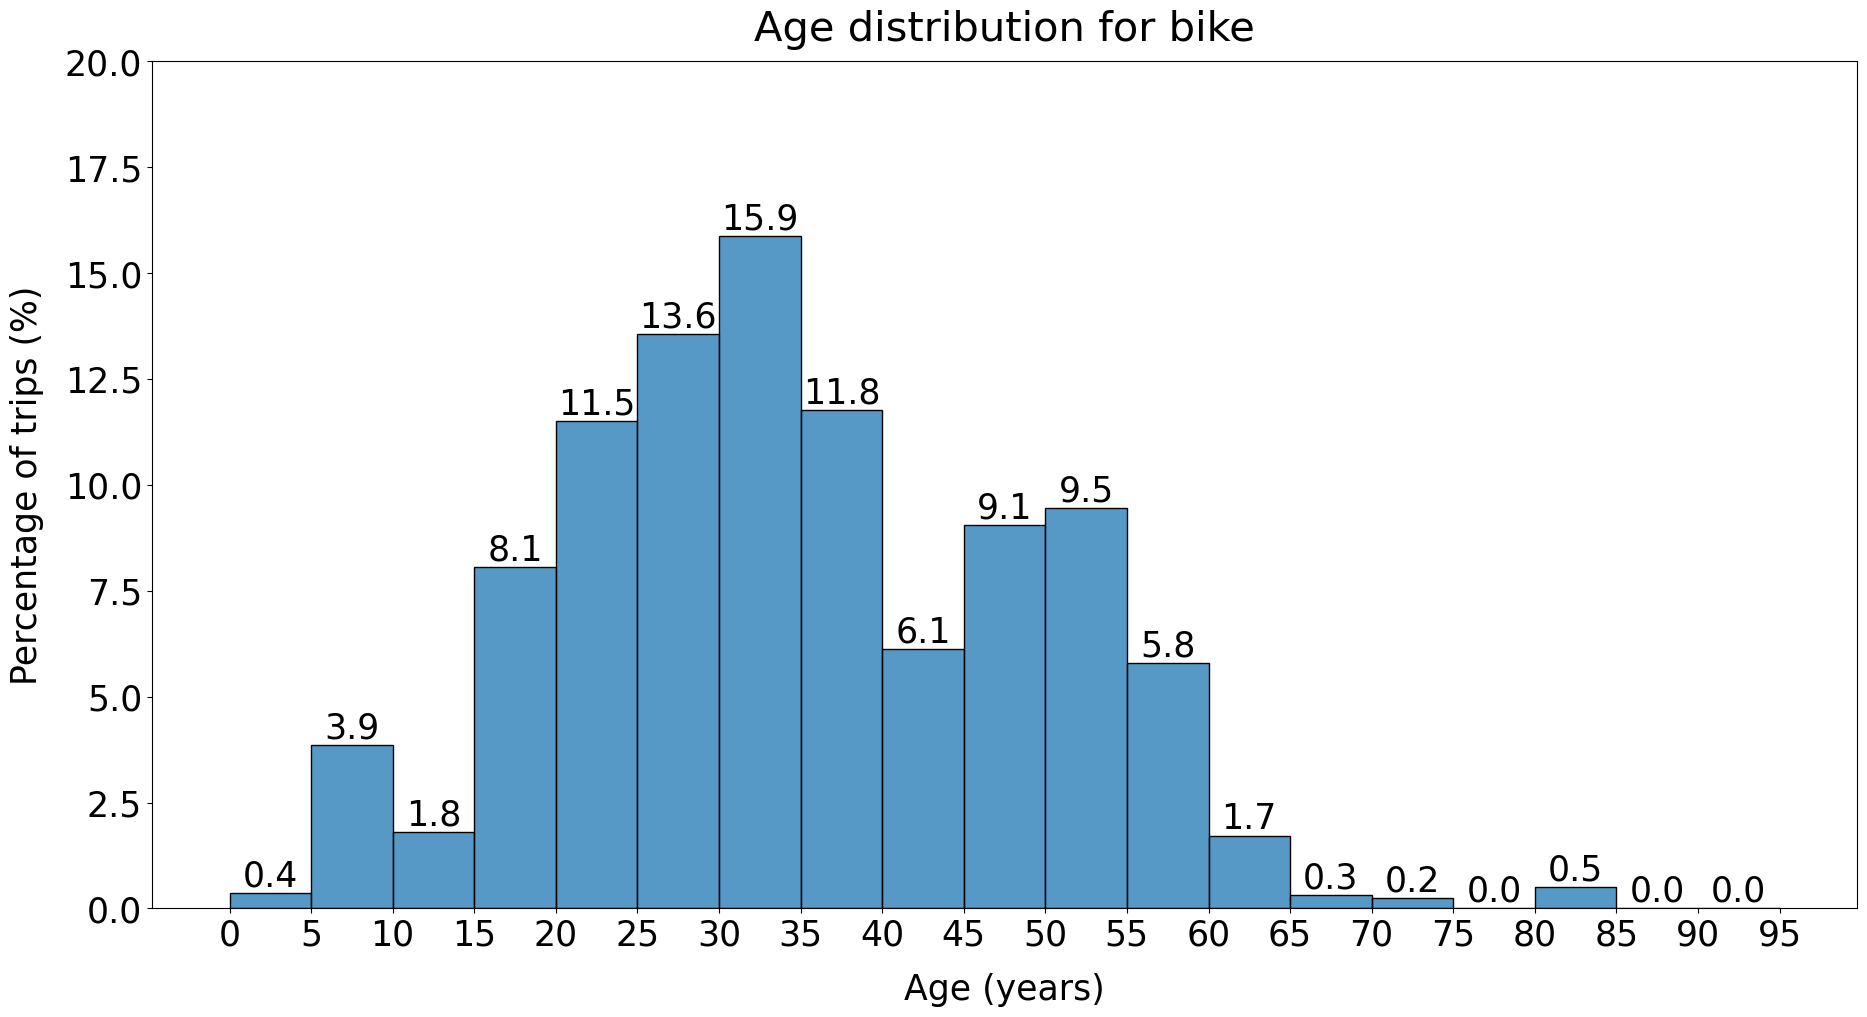

In [38]:
list_bins = list(range(0,100,5))
tsa.plot_histogram_age(bike_trips, age_column, expansion_factor = expansion_factor_trip, 
                       list_bins = list_bins, mode = 'bike', save=True)

/home/oem/Documents/ic/bikesp-analysis/data_analysis/TravelSurvey/modules/TravelSurveyAnalysis.py:119: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), size=25)


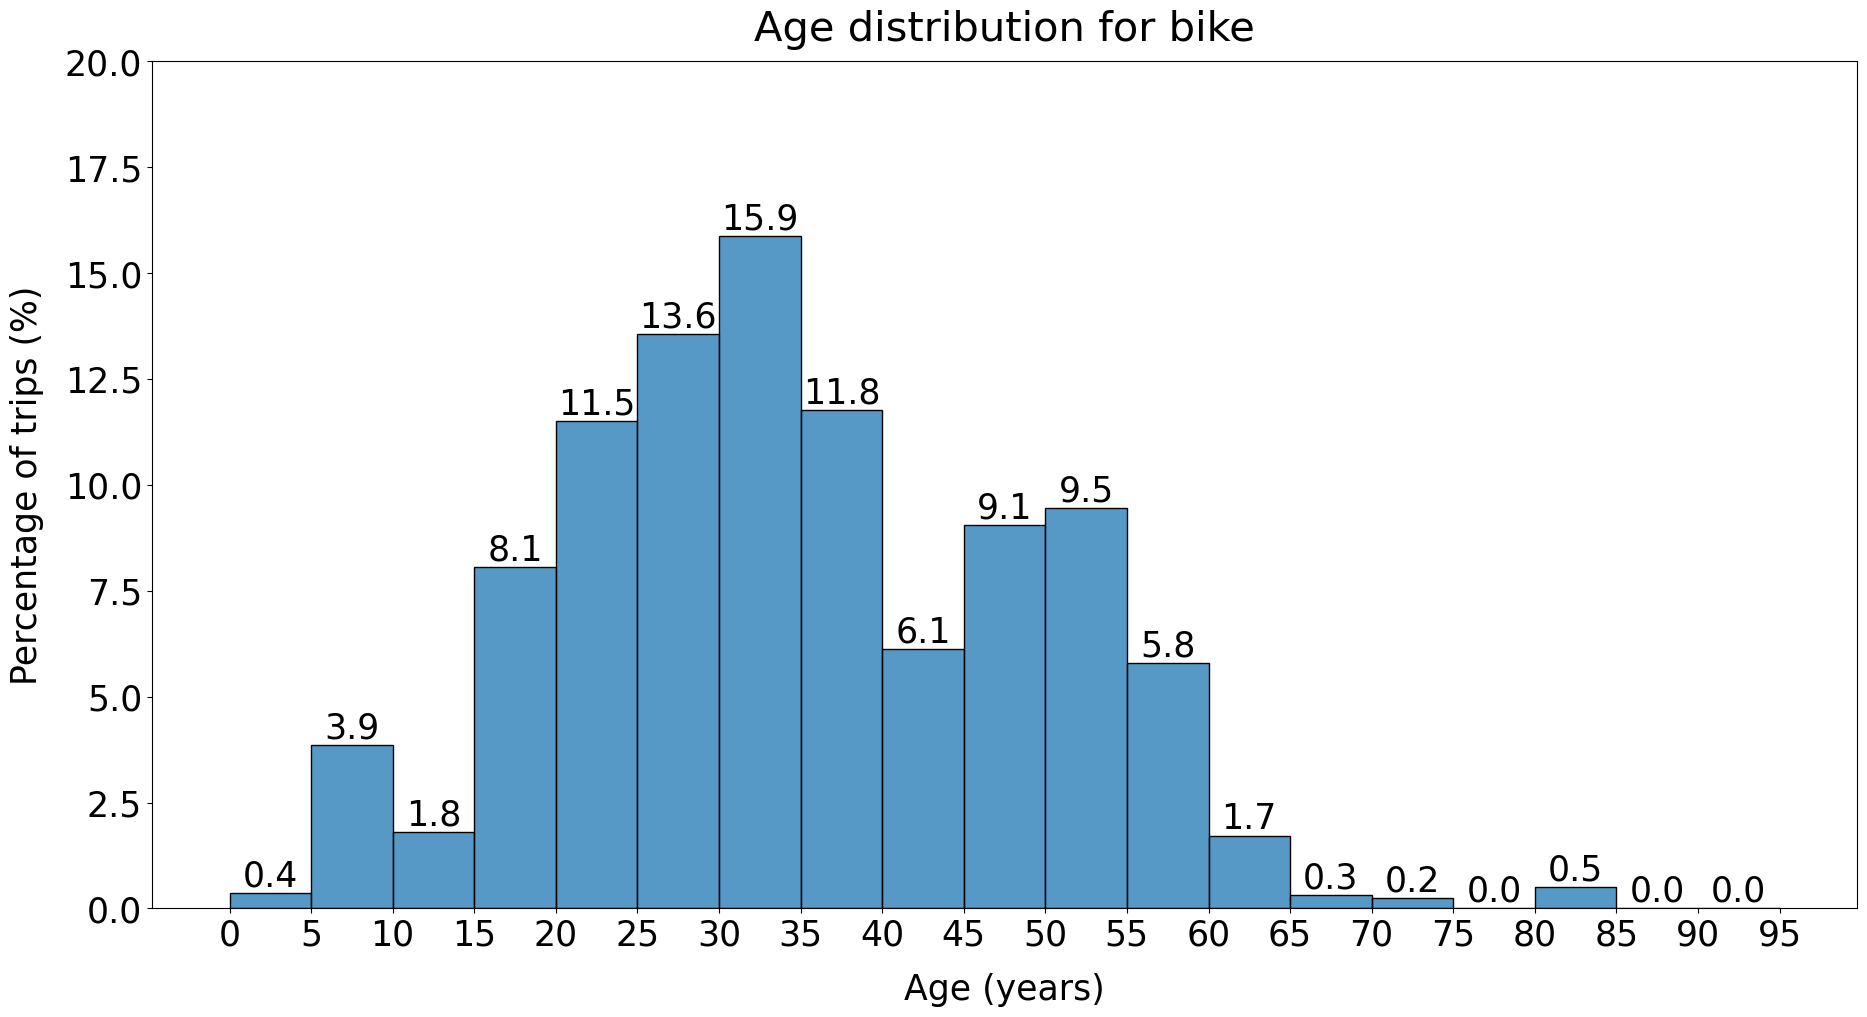

In [39]:
list_bins = list(range(0,100,5))
tsa.plot_histogram_age(bike_trips, age_column, expansion_factor = expansion_factor_person, 
                       list_bins = list_bins, mode = 'bike', save=True)

/home/oem/Documents/ic/bikesp-analysis/data_analysis/TravelSurvey/modules/TravelSurveyAnalysis.py:119: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), size=25)


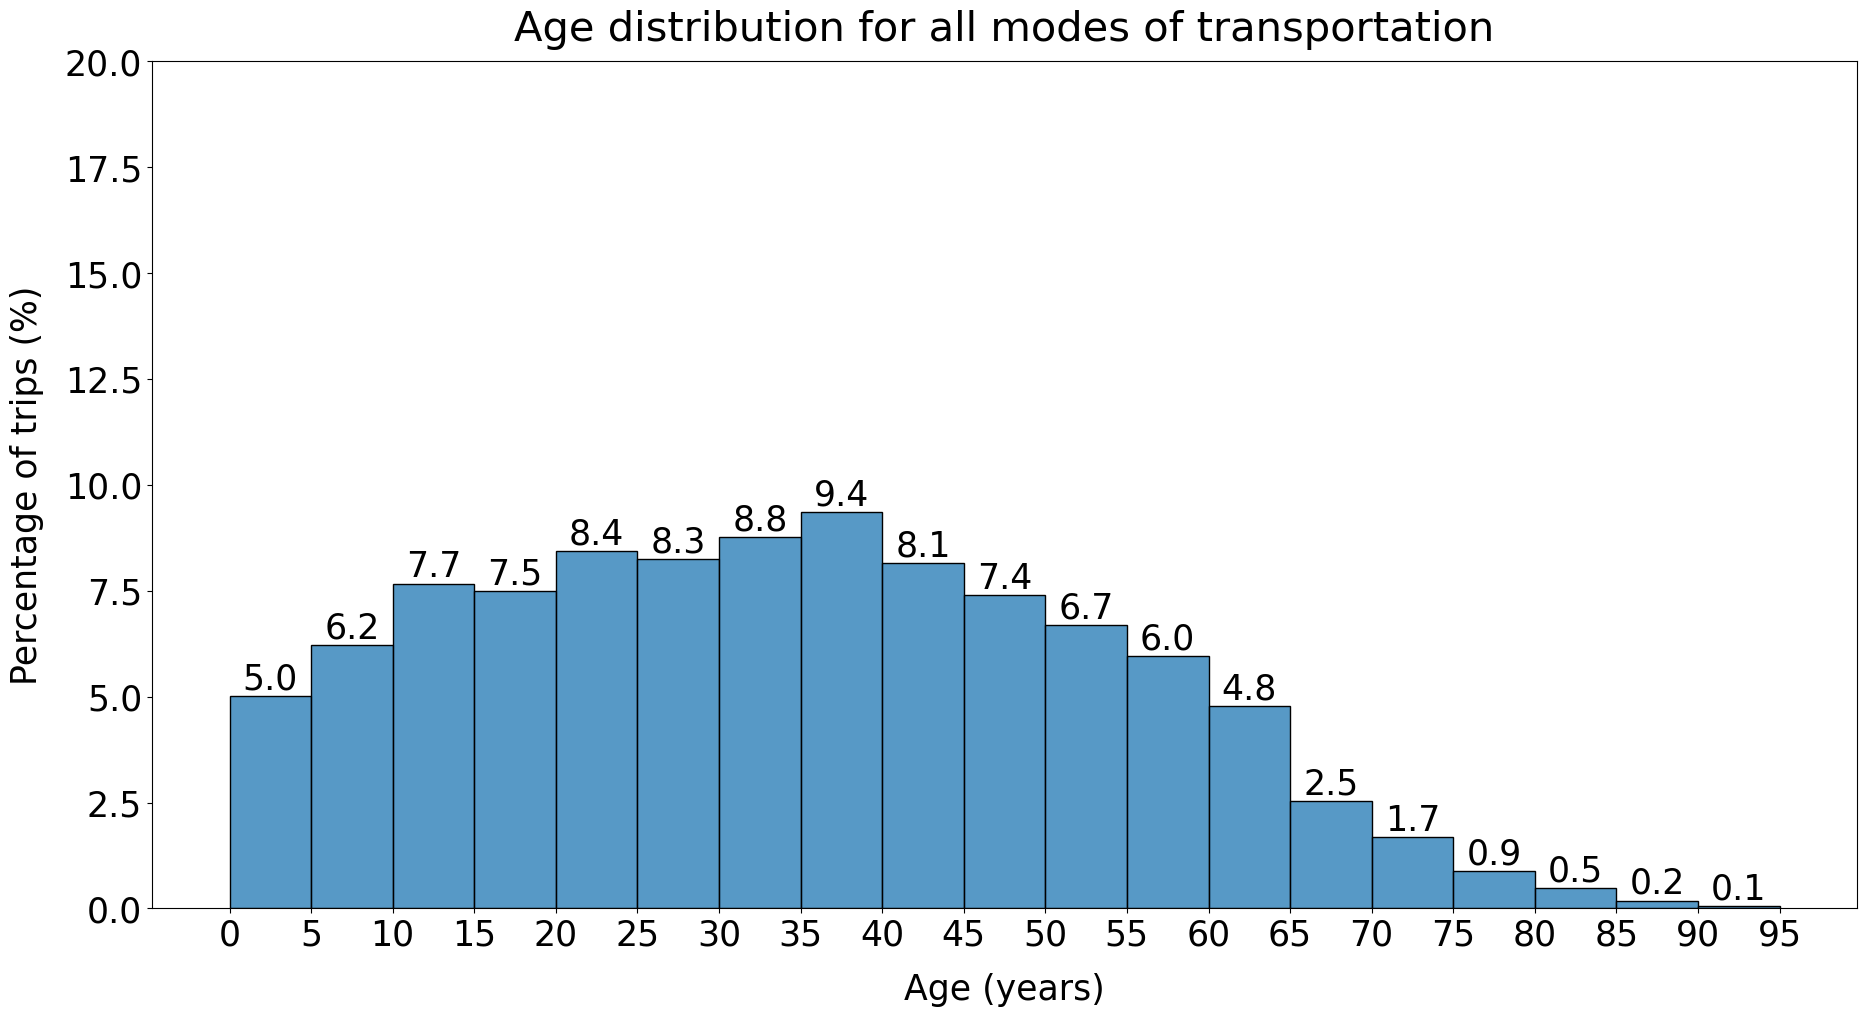

In [40]:
list_bins = list(range(0,100,5))
tsa.plot_histogram_age(data_sp, age_column, expansion_factor = expansion_factor_person, 
                       list_bins = list_bins, mode = 'all modes of transportation', save=True)

/home/oem/Documents/ic/bikesp-analysis/data_analysis/TravelSurvey/modules/TravelSurveyAnalysis.py:119: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), size=25)


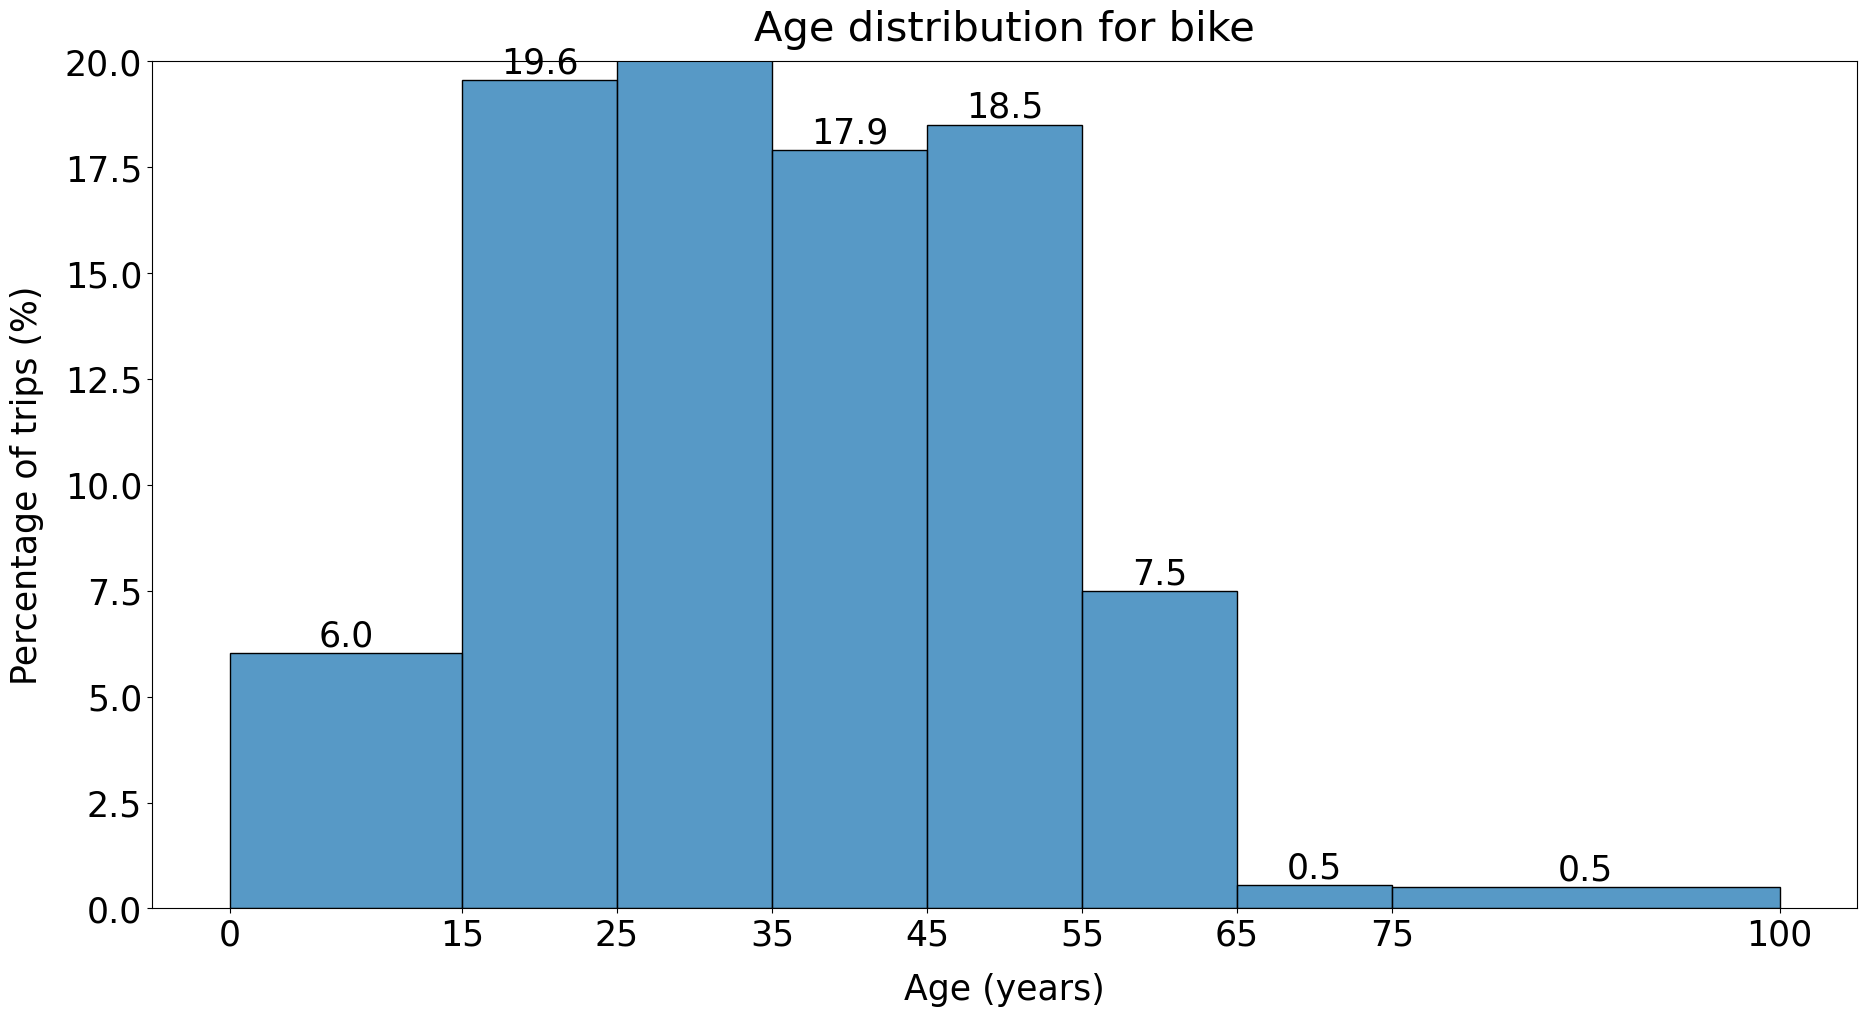

In [41]:
list_bins = [0,15,25,35,45,55,65,75,100]
tsa.plot_histogram_age(bike_trips, variable_column = age_column,
                       expansion_factor = expansion_factor_person,
                       list_bins = list_bins, mode = 'bike', save=False)

In [42]:
public_trips = tsa.get_specific_mode_trips(data_sp, mode_column, [1])
individual_trips = tsa.get_specific_mode_trips(data_sp, mode_column, [2])
walk_trips = tsa.get_specific_mode_trips(data_sp, mode_column, [3])

/home/oem/Documents/ic/bikesp-analysis/data_analysis/TravelSurvey/modules/TravelSurveyAnalysis.py:119: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), size=25)


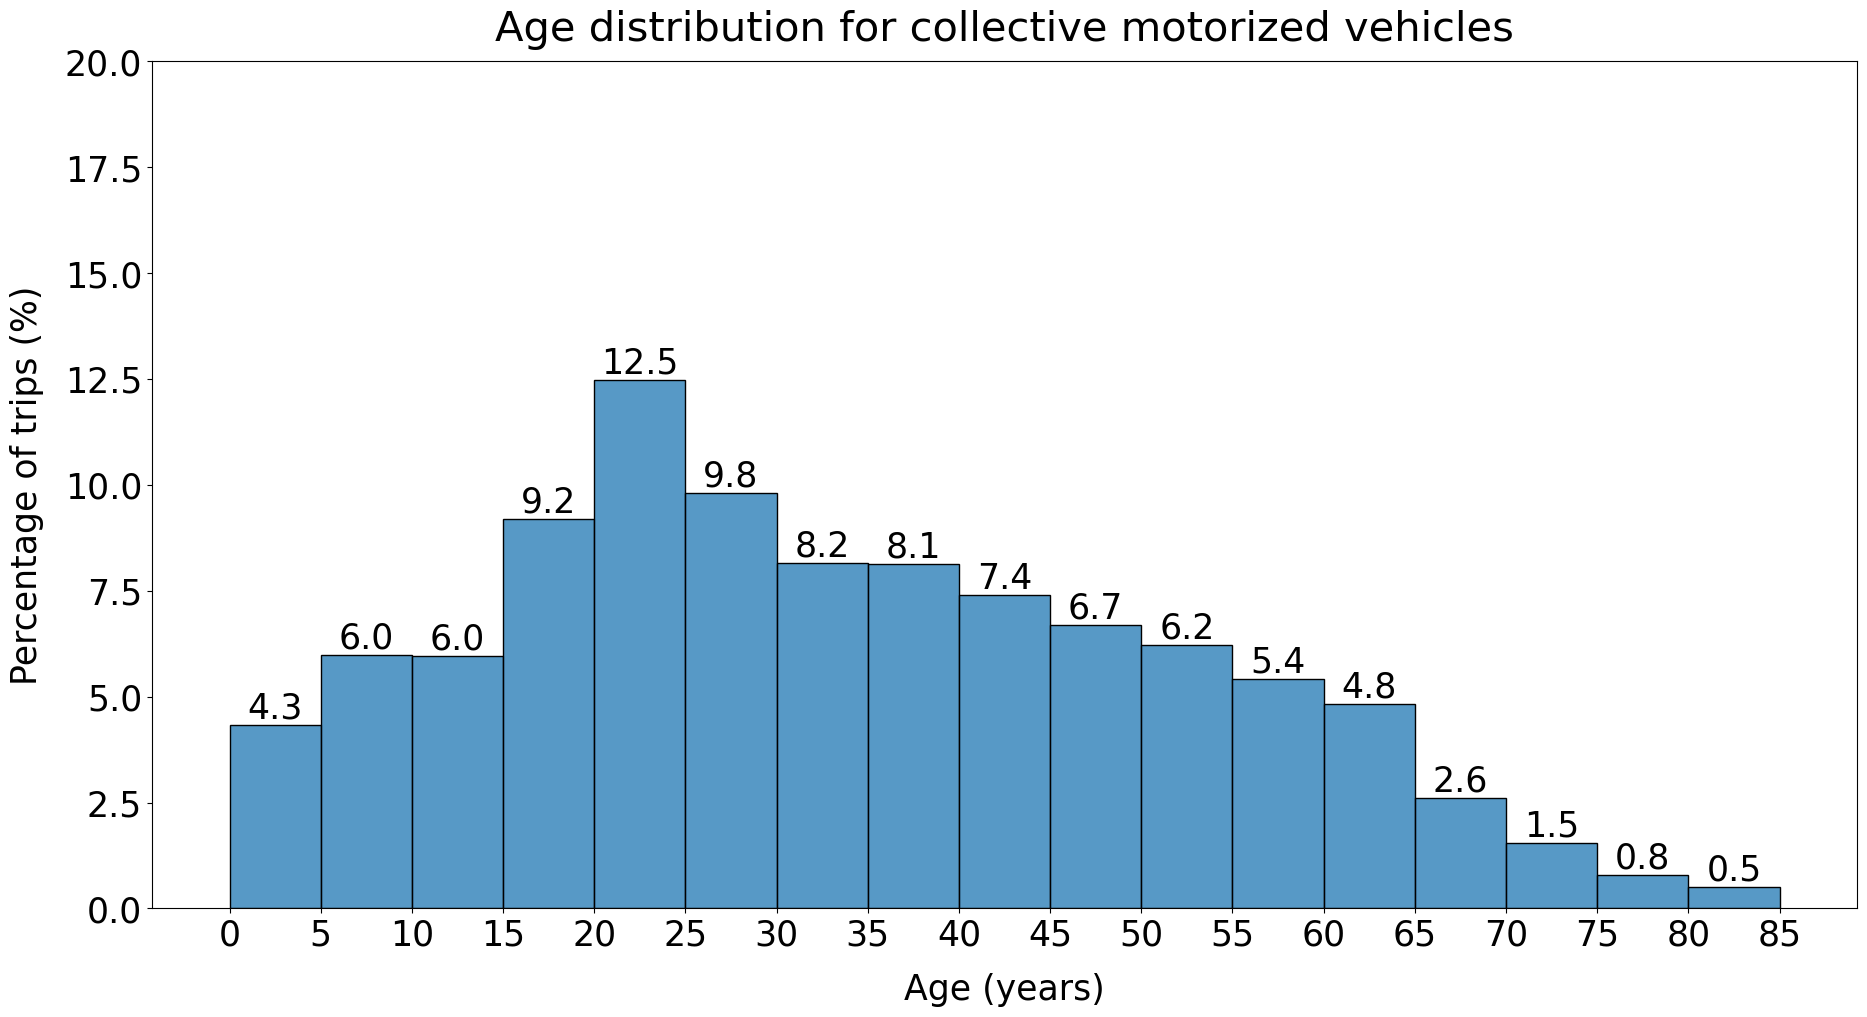

In [43]:
list_bins = list(range(0,90,5))
tsa.plot_histogram_age(public_trips, age_column, expansion_factor = expansion_factor_person, 
                       list_bins = list_bins, mode = 'collective motorized vehicles', save=True)

/home/oem/Documents/ic/bikesp-analysis/data_analysis/TravelSurvey/modules/TravelSurveyAnalysis.py:119: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), size=25)


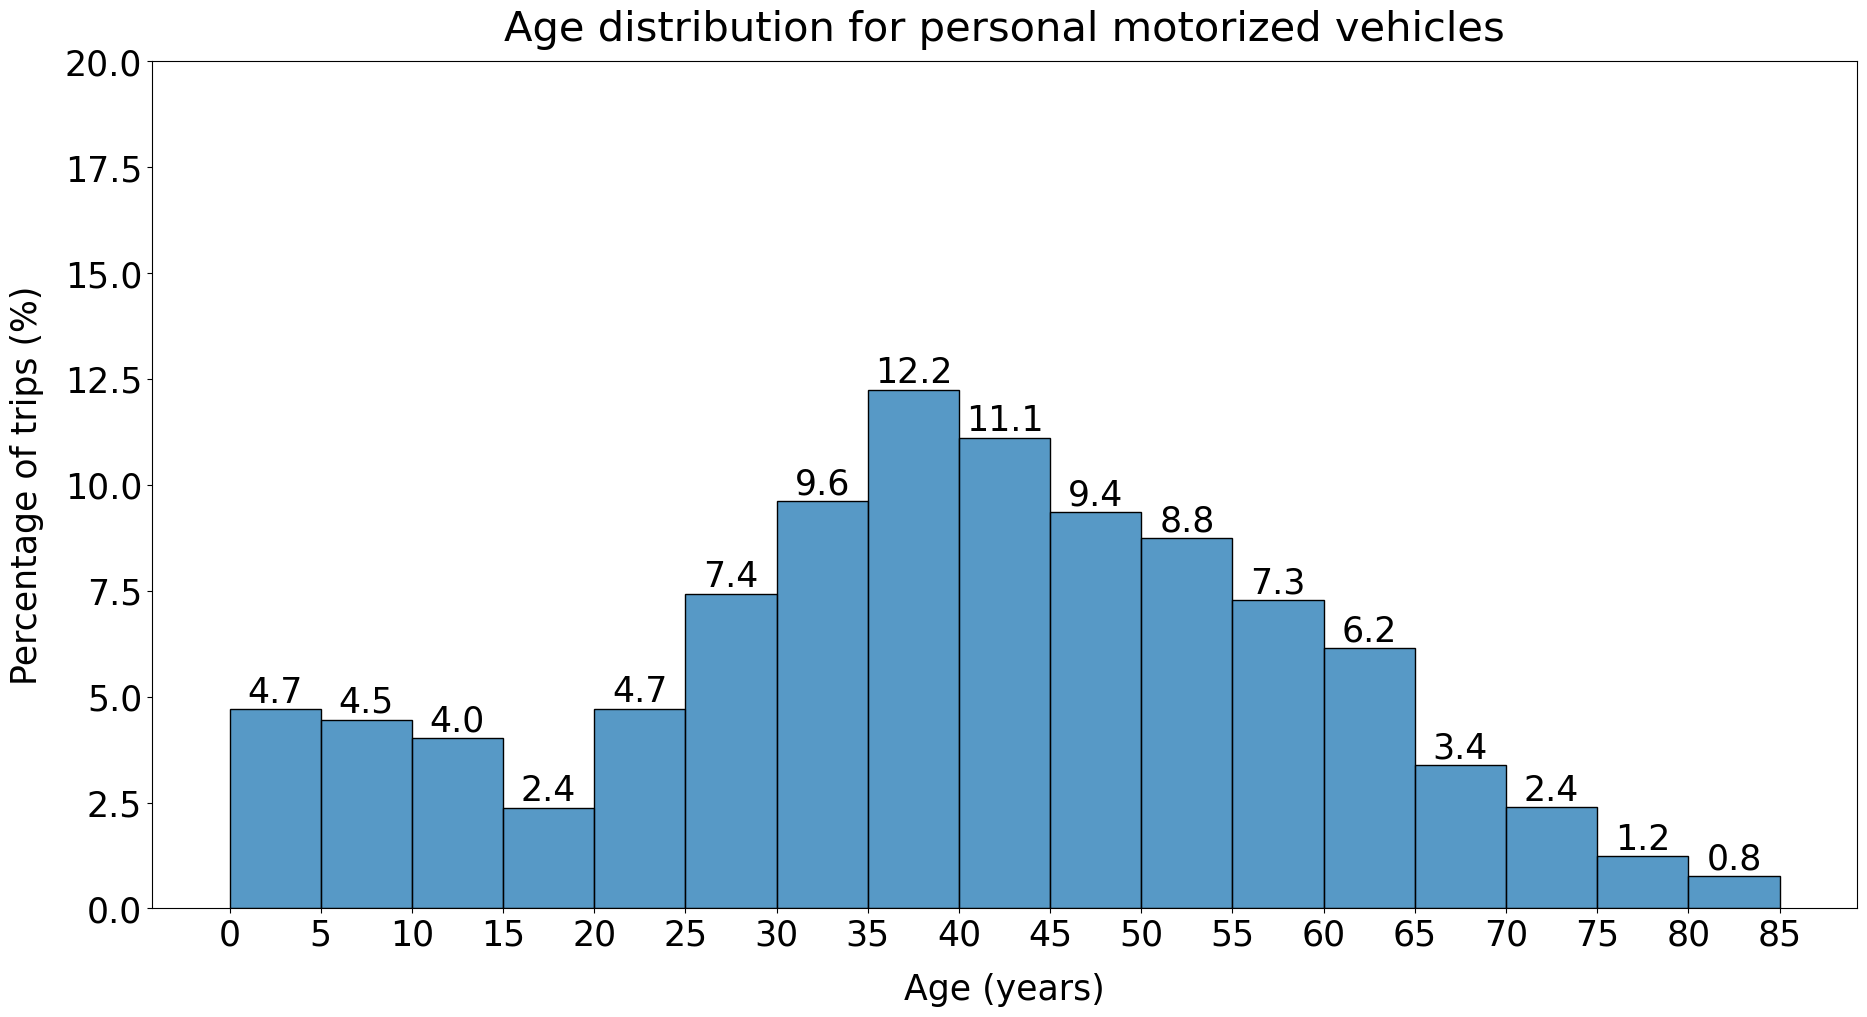

In [44]:
list_bins = list(range(0,90,5))
tsa.plot_histogram_age(individual_trips, age_column, expansion_factor = expansion_factor_person, 
                       list_bins = list_bins, mode = 'personal motorized vehicles', save=True)

/home/oem/Documents/ic/bikesp-analysis/data_analysis/TravelSurvey/modules/TravelSurveyAnalysis.py:119: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), size=25)


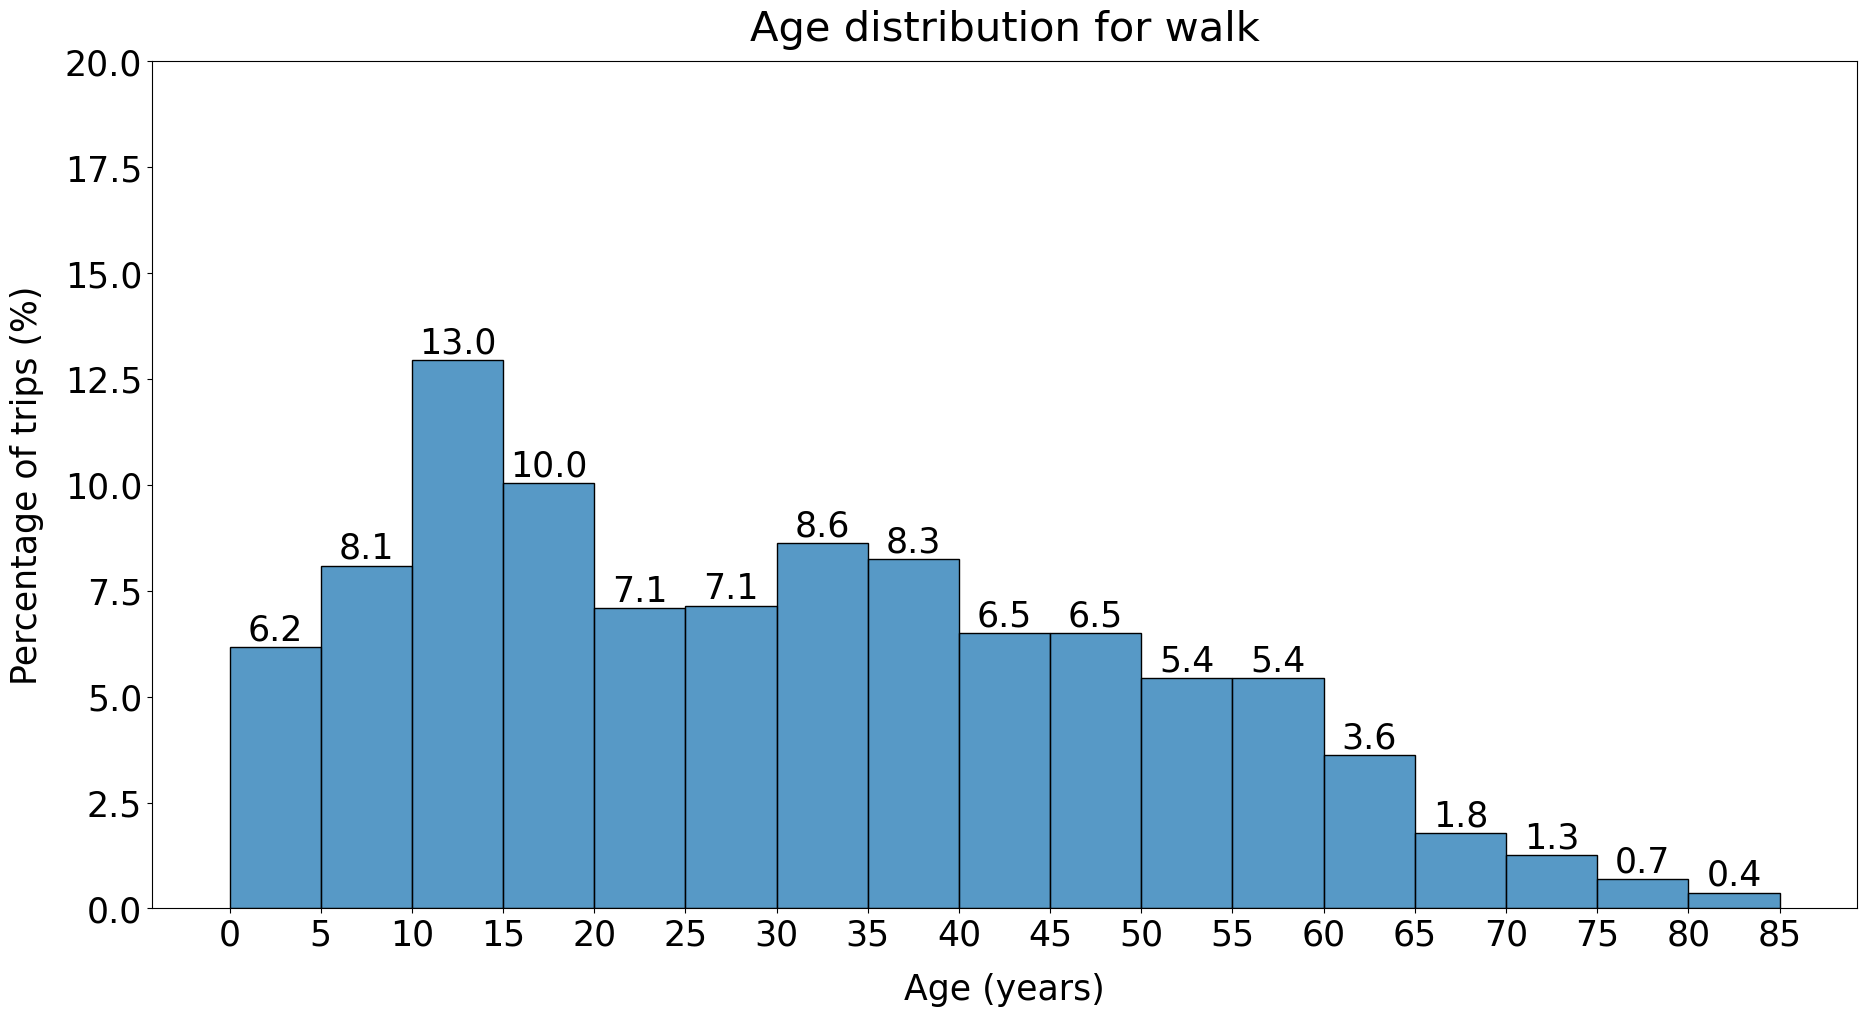

In [45]:
list_bins = list(range(0,90,5))
tsa.plot_histogram_age(walk_trips, age_column, expansion_factor = expansion_factor_person, 
                       list_bins = list_bins, mode = 'walk', save=True)

## Social class

In [46]:
social_class_column = 'CRITERIOBR'
classes_index_map = {1: 'A', 2:'B1', 3:'B2', 4: 'C1', 5:'C2', 6:'D-E'}
tsa.calculate_distribution(data_sp, social_class_column, expansion_factor_person, classes_index_map)

,FE_PESS
CRITERIOBR_new,
A,9.593465
B1,10.837847
B2,30.803366
C1,26.380850
C2,17.521531
D-E,4.862940


In [47]:
tsa.calculate_distribution(data_sp, social_class_column, expansion_factor_trip, classes_index_map)

,FE_VIA
CRITERIOBR_new,
A,9.471637
B1,10.731020
B2,30.732806
C1,26.516034
C2,17.644071
D-E,4.904433


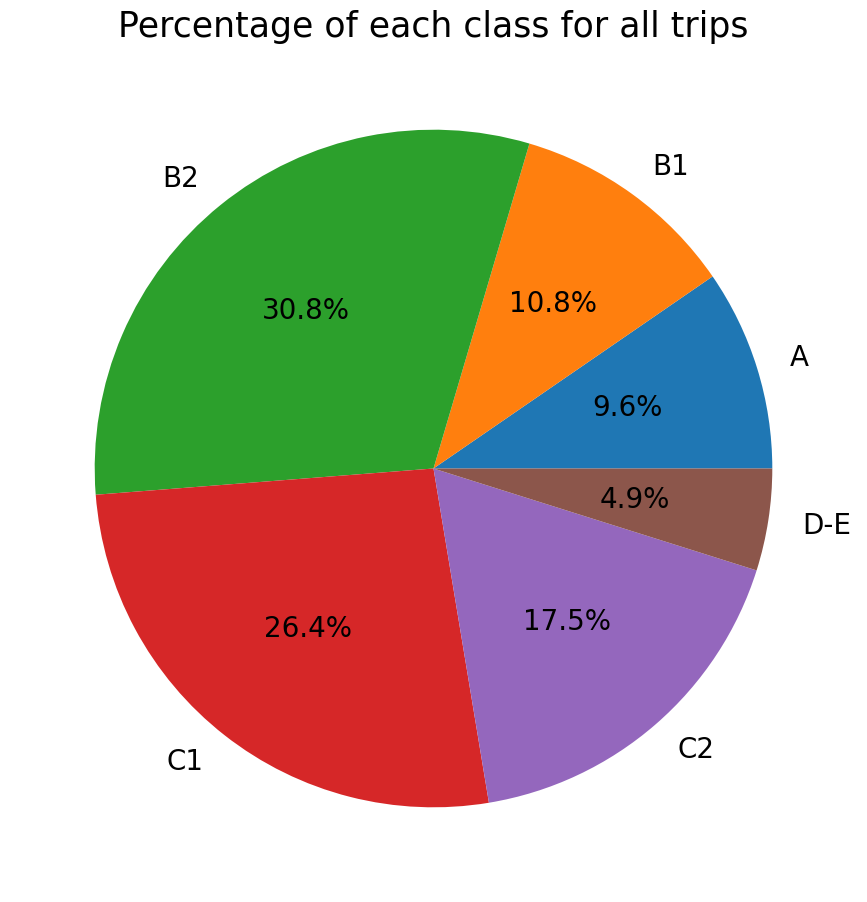

In [48]:
tsa.plot_percentage_class(data_sp, social_class_column, classes_index_map, save=True)

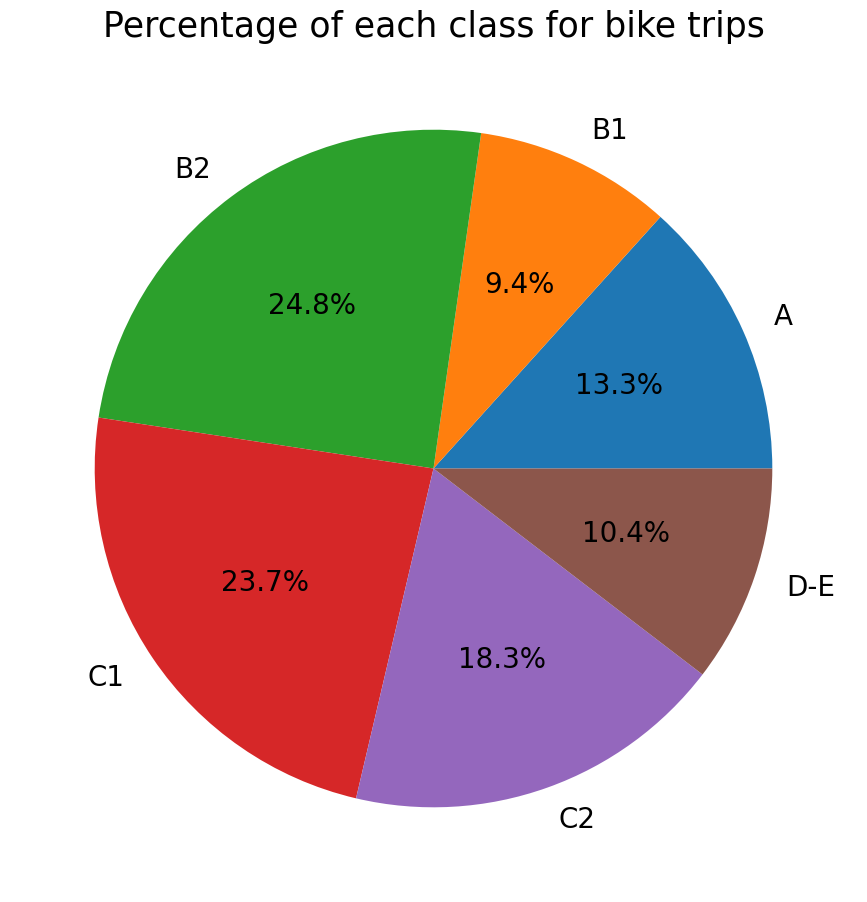

In [49]:
tsa.plot_percentage_class(bike_trips, social_class_column, classes_index_map, bike=True, save=True)

In [50]:
tsa.calculate_distribution(bike_trips, social_class_column, expansion_factor_person, classes_index_map)

,FE_PESS
CRITERIOBR_new,
A,13.320478
B1,9.432612
B2,24.842419
C1,23.732413
C2,18.272221
D-E,10.399858


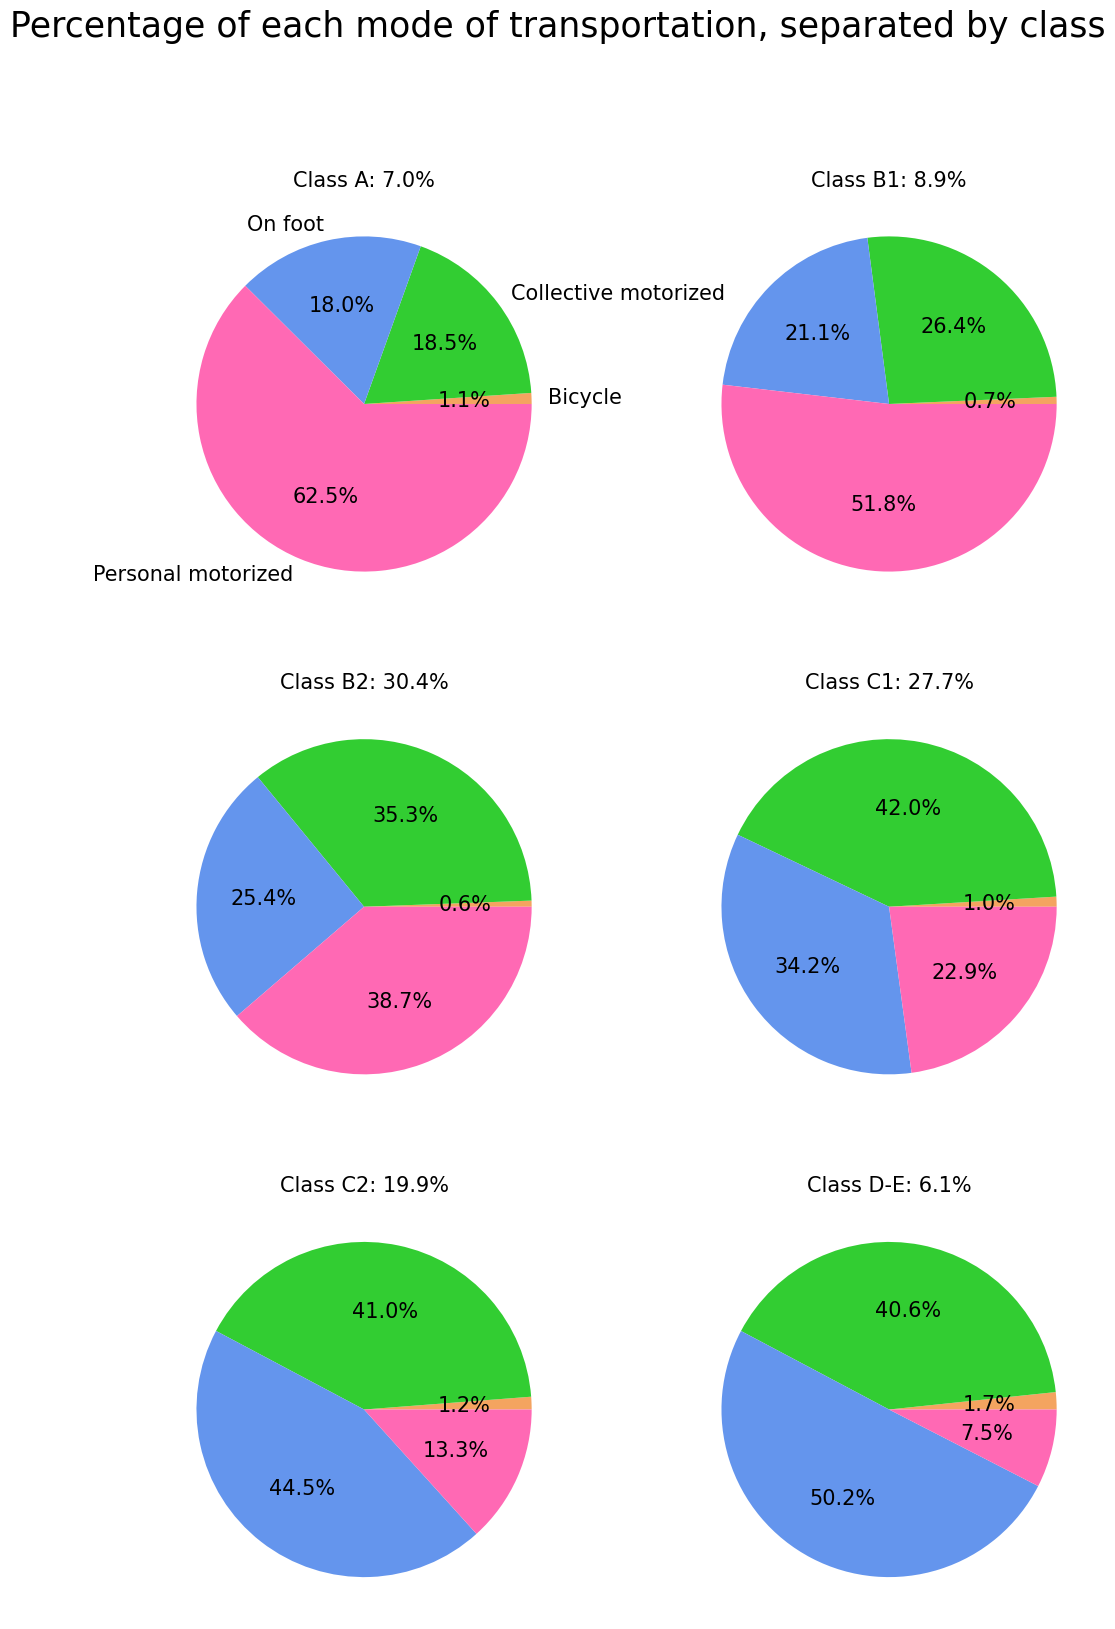

In [51]:
tsa.plot_mode_separated_by_class(data, social_class_column, mode_column, mode_index_map, classes_index_map, save=True)

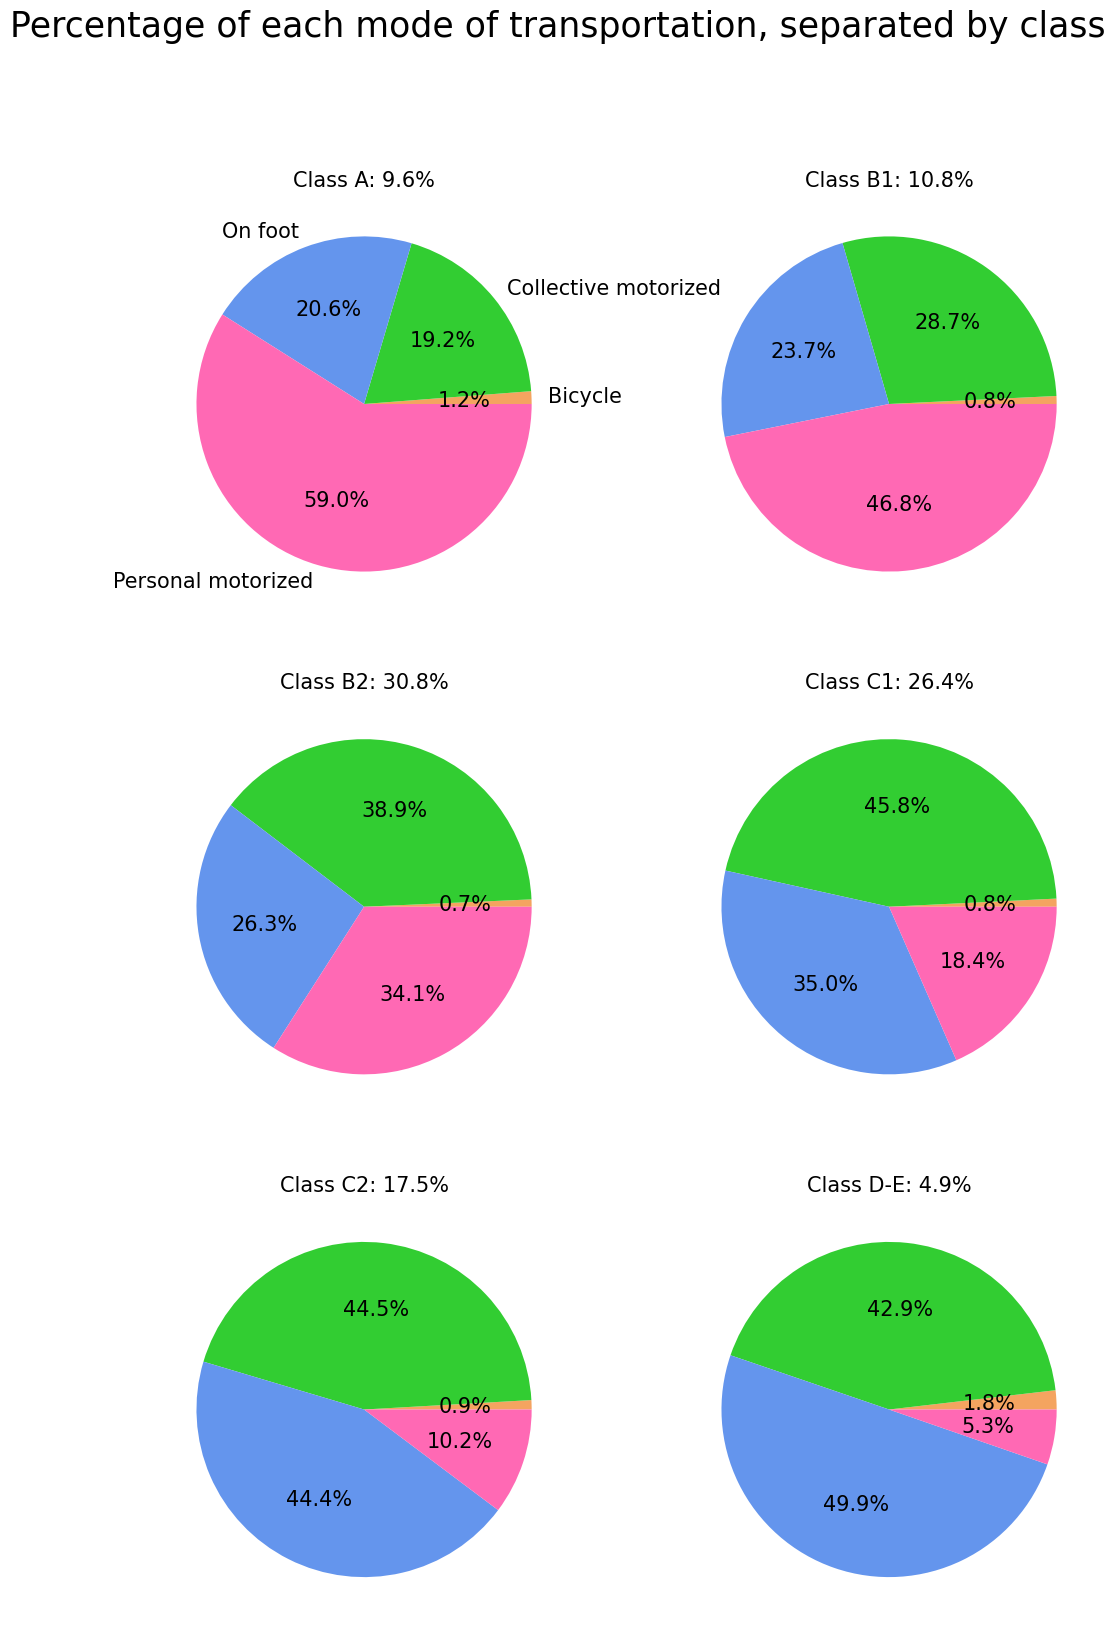

In [52]:
tsa.plot_mode_separated_by_class(data_sp, social_class_column, mode_column, mode_index_map, classes_index_map, save=True)

## Duration

In [53]:
duration_column = 'DURACAO'
new_duration_column = 'Trip duration'

In [54]:
data_sp = tsa.treat_duration_column(data_sp, duration_column, new_duration_column)
data_sp

,ZONA,MUNI_DOM,CO_DOM_X,CO_DOM_Y,ID_DOM,F_DOM,FE_DOM,DOM,CD_ENTRE,DATA,TIPO_DOM,AGUA,RUA_PAVI,NO_MORAD,TOT_FAM,ID_FAM,F_FAM,FE_FAM,FAMILIA,NO_MORAF,CONDMORA,QT_BANHO,QT_EMPRE,QT_AUTO,QT_MICRO,QT_LAVALOU,QT_GEL1,QT_GEL2,QT_FREEZ,QT_MLAVA,QT_DVD,QT_MICROON,QT_MOTO,QT_SECAROU,QT_BICICLE,NAO_DCL_IT,CRITERIOBR,PONTO_BR,ANO_AUTO1,ANO_AUTO2,ANO_AUTO3,RENDA_FA,CD_RENFA,ID_PESS,F_PESS,FE_PESS,PESSOA,SIT_FAM,IDADE,SEXO,ESTUDA,GRAU_INS,CD_ATIVI,CO_REN_I,VL_REN_I,ZONA_ESC,MUNIESC,CO_ESC_X,CO_ESC_Y,TIPO_ESC,ZONATRA1,MUNITRA1,CO_TR1_X,CO_TR1_Y,TRAB1_RE,TRABEXT1,OCUP1,SETOR1,VINC1,ZONATRA2,MUNITRA2,CO_TR2_X,CO_TR2_Y,TRAB2_RE,TRABEXT2,OCUP2,SETOR2,VINC2,N_VIAG,FE_VIA,DIA_SEM,TOT_VIAG,ZONA_O,MUNI_O,CO_O_X,CO_O_Y,ZONA_D,MUNI_D,CO_D_X,CO_D_Y,ZONA_T1,MUNI_T1,CO_T1_X,CO_T1_Y,ZONA_T2,MUNI_T2,CO_T2_X,CO_T2_Y,ZONA_T3,MUNI_T3,CO_T3_X,CO_T3_Y,MOTIVO_O,MOTIVO_D,MOT_SRES,SERVIR_O,SERVIR_D,MODO1,MODO2,MODO3,MODO4,H_SAIDA,MIN_SAIDA,ANDA_O,H_CHEG,MIN_CHEG,ANDA_D,DURACAO,MODOPRIN,TIPVG,PAG_VIAG,TP_ESAUTO,VL_EST,PE_BICI,VIA_BICI,TP_ESBICI,DISTANCIA,ID_ORDEM,TIPVG_new,SEXO_new,CRITERIOBR_new,Trip duration
0,1,36,333743,7394463,10001,1,15.416667,1,1,6092017,1,1,1,2,1,100011,1,15.416667,1,2,2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1,4.0,25.0,NaN,NaN,NaN,2732.58,3,10001101,1,19.532274,1,1,59,2,1,3,1,3,NaN,NaN,NaN,NaN,NaN,NaN,3.0,36.0,333104.0,7394476.0,2.0,2.0,4.0,13.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,22.132647,3.0,2,1.0,36.0,333743.0,7394463.0,3.0,36.0,333104.0,7394476.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,3.0,3.0,2.0,2.0,16.0,NaN,NaN,NaN,5.0,45.0,NaN,5.0,55.0,NaN,10.0,16.0,3.0,NaN,NaN,NaN,1.0,NaN,NaN,639.13,1,On foot,Woman,C1,10
1,1,36,333743,7394463,10001,0,15.416667,1,1,6092017,1,1,1,2,1,100011,0,15.416667,1,2,2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1,4.0,25.0,NaN,NaN,NaN,2732.58,3,10001101,0,19.532274,1,1,59,2,1,3,1,3,NaN,NaN,NaN,NaN,NaN,NaN,3.0,36.0,333104.0,7394476.0,2.0,2.0,4.0,13.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,22.132647,3.0,2,3.0,36.0,333104.0,7394476.0,1.0,36.0,333743.0,7394463.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,8.0,3.0,2.0,2.0,16.0,NaN,NaN,NaN,15.0,45.0,NaN,15.0,55.0,NaN,10.0,16.0,3.0,NaN,NaN,NaN,1.0,NaN,NaN,639.13,2,On foot,Woman,C1,10
2,1,36,333743,7394463,10001,0,15.416667,1,1,6092017,1,1,1,2,1,100011,0,15.416667,1,2,2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1,4.0,25.0,NaN,NaN,NaN,2732.58,3,10001102,1,16.663976,2,3,21,2,5,4,1,3,NaN,84.0,36.0,329431.0,7395939.0,2.0,82.0,36.0,327503.0,7392159.0,2.0,2.0,4.0,7.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,18.882487,3.0,3,1.0,36.0,333743.0,7394463.0,82.0,36.0,327503.0,7392159.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,3.0,3.0,2.0,2.0,1.0,NaN,NaN,NaN,9.0,0.0,10.0,9.0,50.0,20.0,50.0,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,6651.77,3,Collective motorized,Woman,C1,50
3,1,36,333743,7394463,10001,0,15.416667,1,1,6092017,1,1,1,2,1,100011,0,15.416667,1,2,2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1,4.0,25.0,NaN,NaN,NaN,2732.58,3,10001102,0,16.663976,2,3,21,2,5,4,1,3,NaN,84.0,36.0,329431.0,7395939.0,2.0,82.0,36.0,327503.0,7392159.0,2.0,2.0,4.0,7.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,18.882487,3.0,3,82.0,36.0,327503.0,7392159.0,84.0,36.0,329431.0,7395939.0,93.0,36.0,329861.0,7397268.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,4.0,4.0,2.0,2.0,1.0,4.0,NaN,NaN,17.0,0.0,20.0,18.0,0.0,1.0,60.0,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,4243.30,4,Collective motorized,Woman,C1,60
4,1,36,333743,7394463,10001,0,15.416667,1,1,6092017,1,1,1,2,1,100011,0,15.416667,1,2,2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1,4.0,25.0,NaN,NaN,NaN,2732.58,3,10001102,0,16.663976,2,3,21,2,5,4,1,3,NaN,84.0,36.0,329431.0,7395939.0,2.0,82.0,36.0,327503.0,7392159.0,2.0,2.0,4.0,7.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,18.882487,3.0,3,84.0,36.0,329431.0,7395939.0,1.0,36.0,333743.0,7394463.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,8.0,4.0,2.0,2.0,12.0,NaN,NaN,NaN,22.0,50.0,1.0,23.0,30.0,1.0,40.0,12

In [55]:
bike_trips = tsa.get_specific_mode_trips(data_sp, mode_column, [4])
bike_trips

,ZONA,MUNI_DOM,CO_DOM_X,CO_DOM_Y,ID_DOM,F_DOM,FE_DOM,DOM,CD_ENTRE,DATA,TIPO_DOM,AGUA,RUA_PAVI,NO_MORAD,TOT_FAM,ID_FAM,F_FAM,FE_FAM,FAMILIA,NO_MORAF,CONDMORA,QT_BANHO,QT_EMPRE,QT_AUTO,QT_MICRO,QT_LAVALOU,QT_GEL1,QT_GEL2,QT_FREEZ,QT_MLAVA,QT_DVD,QT_MICROON,QT_MOTO,QT_SECAROU,QT_BICICLE,NAO_DCL_IT,CRITERIOBR,PONTO_BR,ANO_AUTO1,ANO_AUTO2,ANO_AUTO3,RENDA_FA,CD_RENFA,ID_PESS,F_PESS,FE_PESS,PESSOA,SIT_FAM,IDADE,SEXO,ESTUDA,GRAU_INS,CD_ATIVI,CO_REN_I,VL_REN_I,ZONA_ESC,MUNIESC,CO_ESC_X,CO_ESC_Y,TIPO_ESC,ZONATRA1,MUNITRA1,CO_TR1_X,CO_TR1_Y,TRAB1_RE,TRABEXT1,OCUP1,SETOR1,VINC1,ZONATRA2,MUNITRA2,CO_TR2_X,CO_TR2_Y,TRAB2_RE,TRABEXT2,OCUP2,SETOR2,VINC2,N_VIAG,FE_VIA,DIA_SEM,TOT_VIAG,ZONA_O,MUNI_O,CO_O_X,CO_O_Y,ZONA_D,MUNI_D,CO_D_X,CO_D_Y,ZONA_T1,MUNI_T1,CO_T1_X,CO_T1_Y,ZONA_T2,MUNI_T2,CO_T2_X,CO_T2_Y,ZONA_T3,MUNI_T3,CO_T3_X,CO_T3_Y,MOTIVO_O,MOTIVO_D,MOT_SRES,SERVIR_O,SERVIR_D,MODO1,MODO2,MODO3,MODO4,H_SAIDA,MIN_SAIDA,ANDA_O,H_CHEG,MIN_CHEG,ANDA_D,DURACAO,MODOPRIN,TIPVG,PAG_VIAG,TP_ESAUTO,VL_EST,PE_BICI,VIA_BICI,TP_ESBICI,DISTANCIA,ID_ORDEM,TIPVG_new,SEXO_new,CRITERIOBR_new,Trip duration
449,2,36,333638,7394792,20877,1,68.750000,877,1,2082018,1,1,1,5,1,208771,1,68.750000,1,5,2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,1,5.0,20.0,NaN,NaN,NaN,1908.00,1,20877101,1,27.983193,1,1,71,1,1,2,4,1,954.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,45.993065,4.0,8,2.0,36.0,333638.0,7394792.0,20.0,36.0,333510.0,7393212.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,4.0,4.0,2.0,1.0,15.0,NaN,NaN,NaN,8.0,0.0,1.0,8.0,10.0,1.0,10.0,15.0,4.0,NaN,NaN,NaN,1.0,2.0,8.0,1585.18,450,Bicycle,Man,C2,10
450,2,36,333638,7394792,20877,0,68.750000,877,1,2082018,1,1,1,5,1,208771,0,68.750000,1,5,2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,1,5.0,20.0,NaN,NaN,NaN,1908.00,1,20877101,0,27.983193,1,1,71,1,1,2,4,1,954.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,45.993065,4.0,8,20.0,36.0,333510.0,7393212.0,2.0,36.0,333638.0,7394792.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,8.0,4.0,1.0,2.0,15.0,NaN,NaN,NaN,8.0,10.0,1.0,8.0,20.0,1.0,10.0,15.0,4.0,NaN,NaN,NaN,1.0,2.0,3.0,1585.18,451,Bicycle,Man,C2,10
451,2,36,333638,7394792,20877,0,68.750000,877,1,2082018,1,1,1,5,1,208771,0,68.750000,1,5,2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,1,5.0,20.0,NaN,NaN,NaN,1908.00,1,20877101,0,27.983193,1,1,71,1,1,2,4,1,954.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,45.993065,4.0,8,2.0,36.0,333638.0,7394792.0,20.0,36.0,333510.0,7393212.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,4.0,4.0,2.0,1.0,15.0,NaN,NaN,NaN,10.0,50.0,1.0,11.0,0.0,1.0,10.0,15.0,4.0,NaN,NaN,NaN,1.0,2.0,8.0,1585.18,452,Bicycle,Man,C2,10
452,2,36,333638,7394792,20877,0,68.750000,877,1,2082018,1,1,1,5,1,208771,0,68.750000,1,5,2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,1,5.0,20.0,NaN,NaN,NaN,1908.00,1,20877101,0,27.983193,1,1,71,1,1,2,4,1,954.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,45.993065,4.0,8,20.0,36.0,333510.0,7393212.0,2.0,36.0,333638.0,7394792.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,8.0,4.0,1.0,2.0,15.0,NaN,NaN,NaN,11.0,0.0,1.0,11.0,10.0,1.0,10.0,15.0,4.0,NaN,NaN,NaN,1.0,2.0,3.0,1585.18,453,Bicycle,Man,C2,10
453,2,36,333638,7394792,20877,0,68.750000,877,1,2082018,1,1,1,5,1,208771,0,68.750000,1,5,2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,1,5.0,20.0,NaN,NaN,NaN,1908.00,1,20877101,0,27.983193,1,1,71,1,1,2,4,1,954.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,45.993065,4.0,8,2.0,36.0,333638.0,7394792.0,3.0,36.0,333759.0,7394160.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,4.0,4.0,2.0,1.0,15.0,NaN,NaN,NaN,13.0,20.0,1.0,13.0,30.0,1.0,10.0,15.0,4.0,NaN,NaN,NaN,1.0,2.0,8.0,643.48,454,Bicycle,Man,C2,10
...,...,...,...,...,...,...,...,...,...,...,...,..

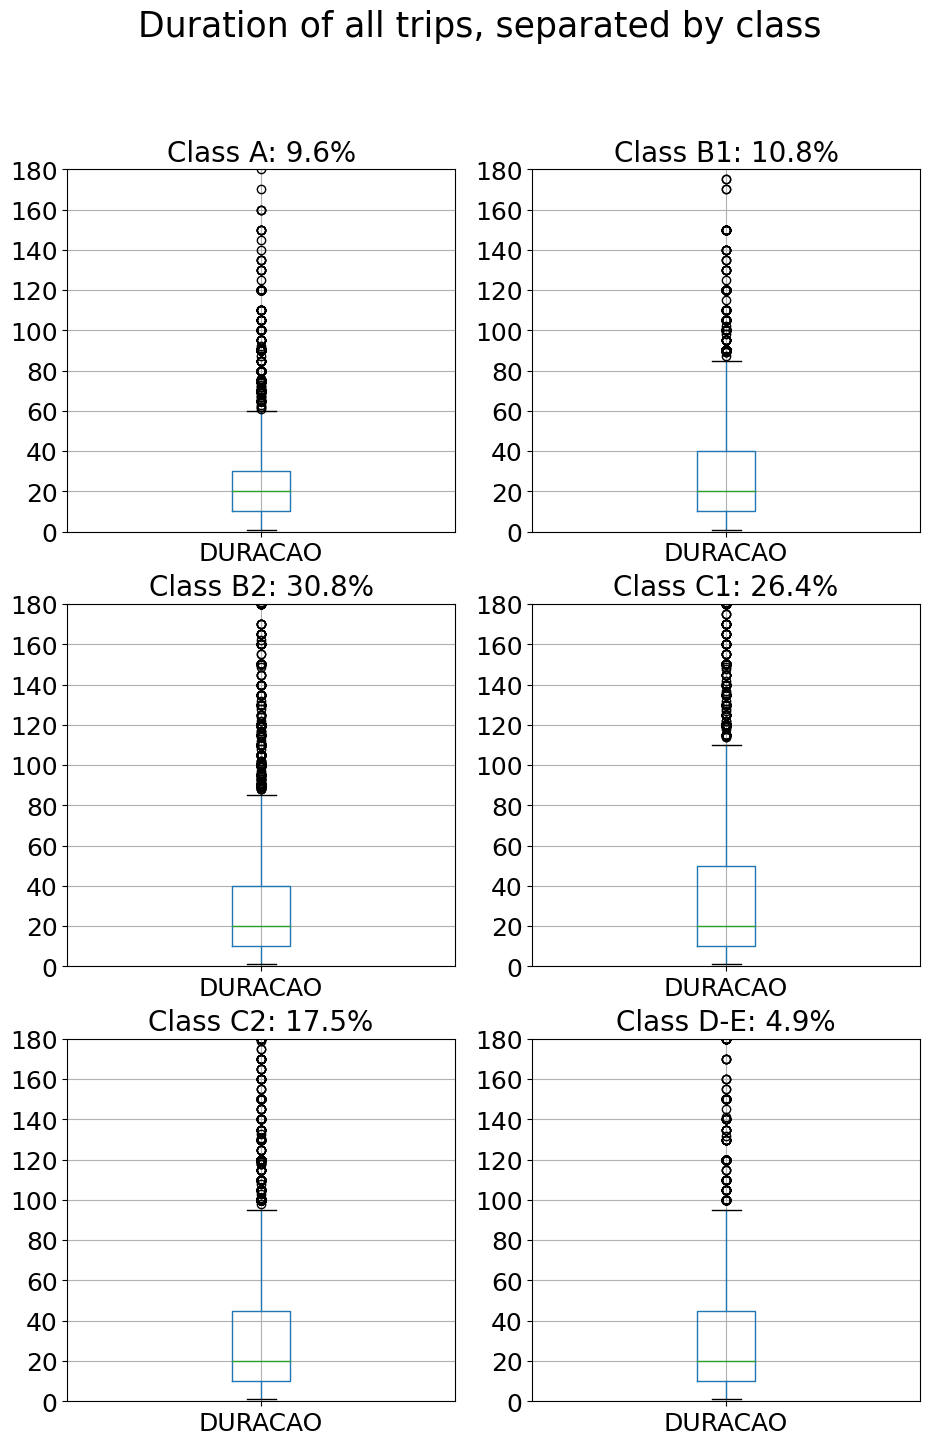

In [56]:
tsa.plot_duration_separated_by_class(data_sp, duration_column, social_class_column, classes_index_map, save=True)

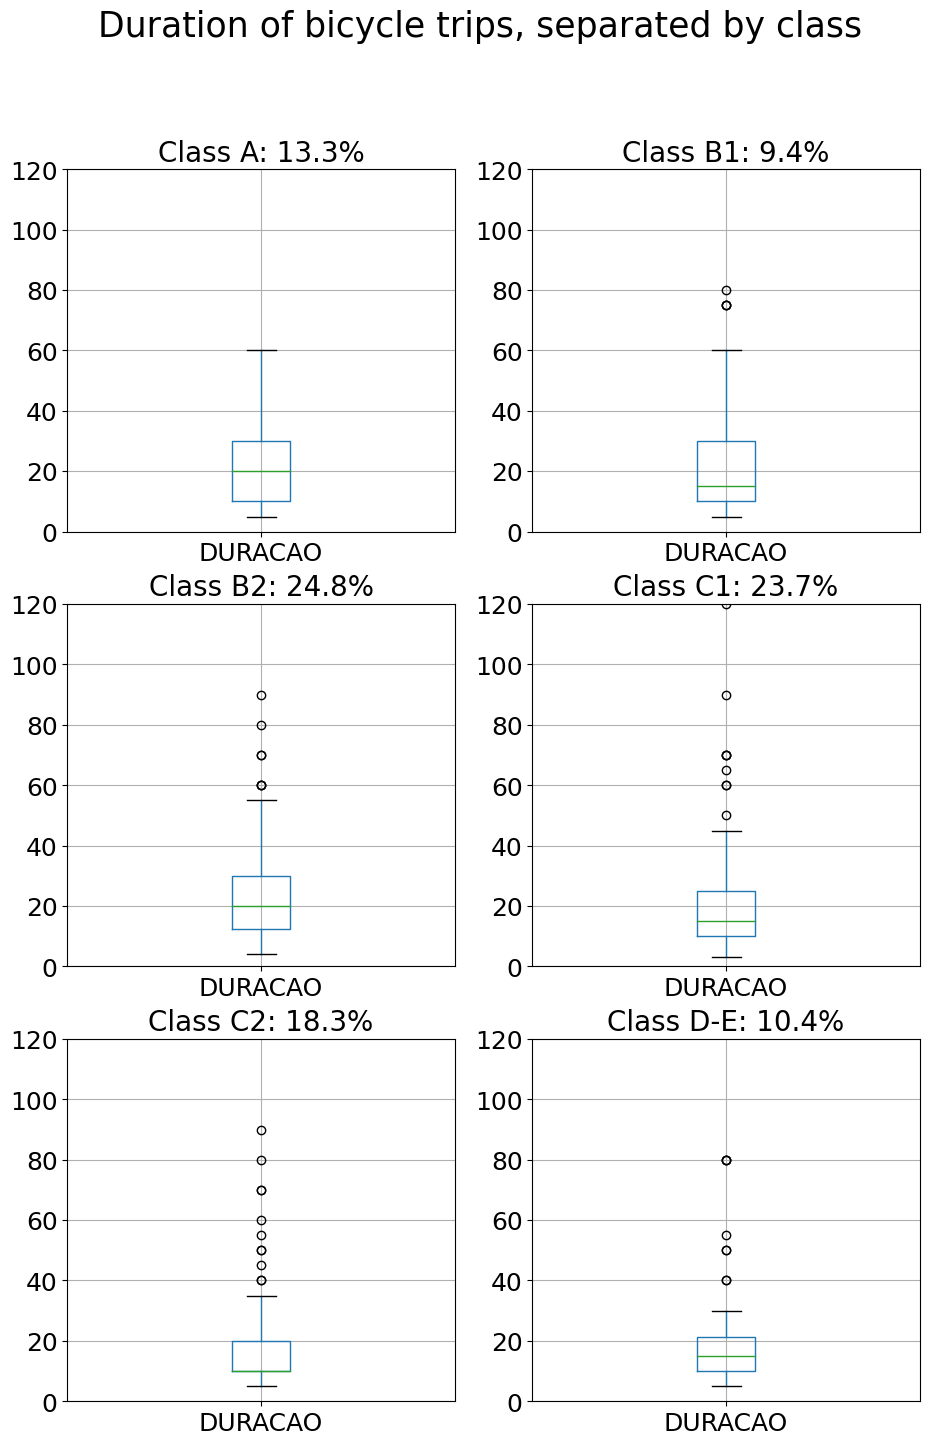

In [57]:
tsa.plot_duration_separated_by_class(bike_trips, duration_column, social_class_column, classes_index_map, bike=True, save=True)

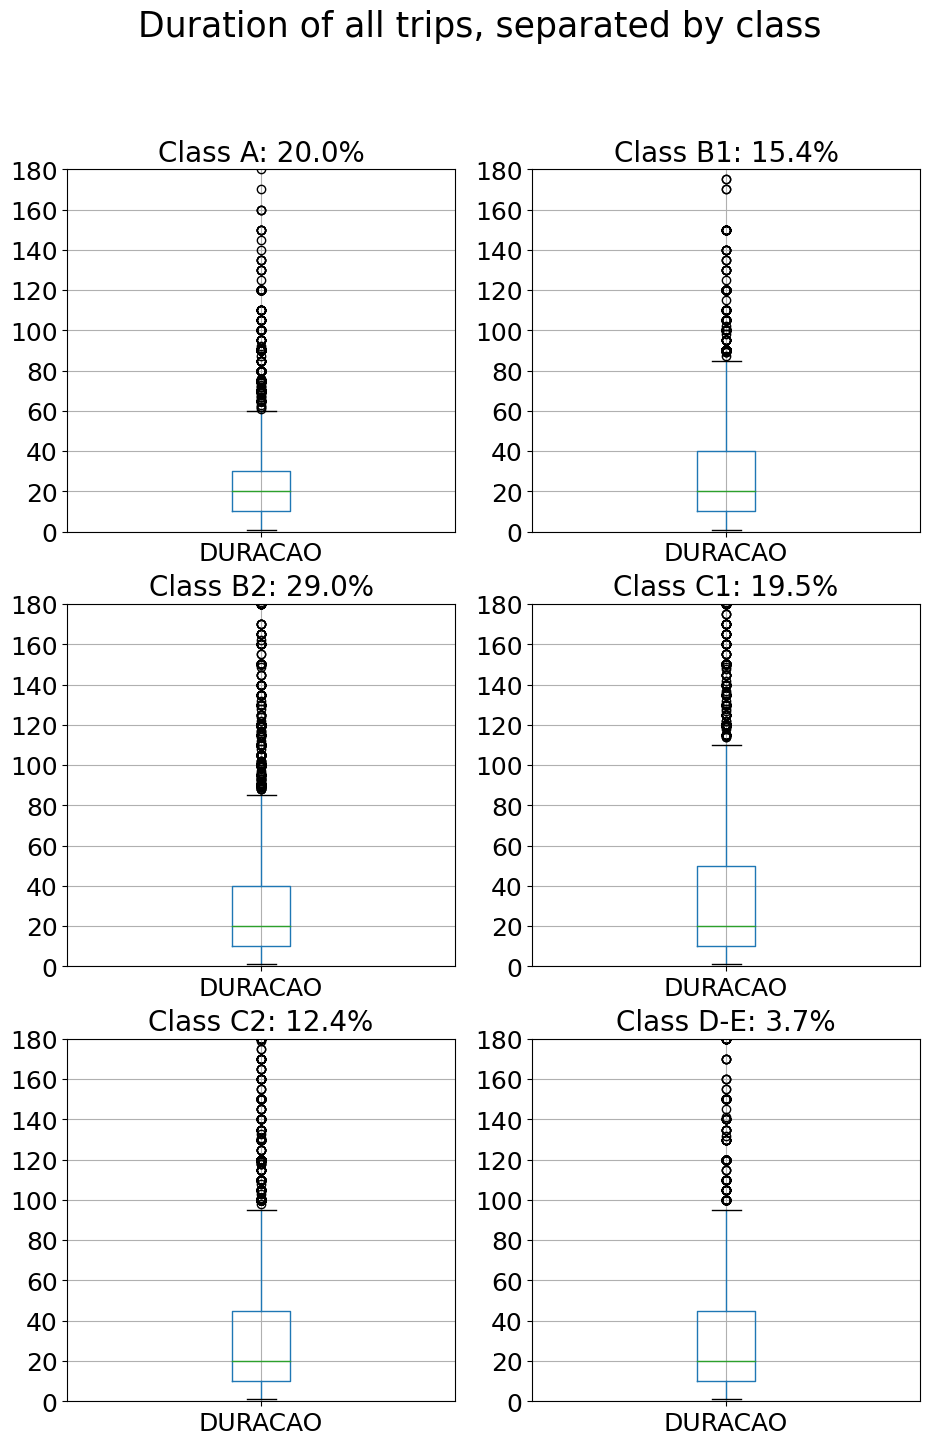

In [58]:
tsa.plot_duration_separated_by_class(data_sp, duration_column, social_class_column, classes_index_map, expansion_factor=False)

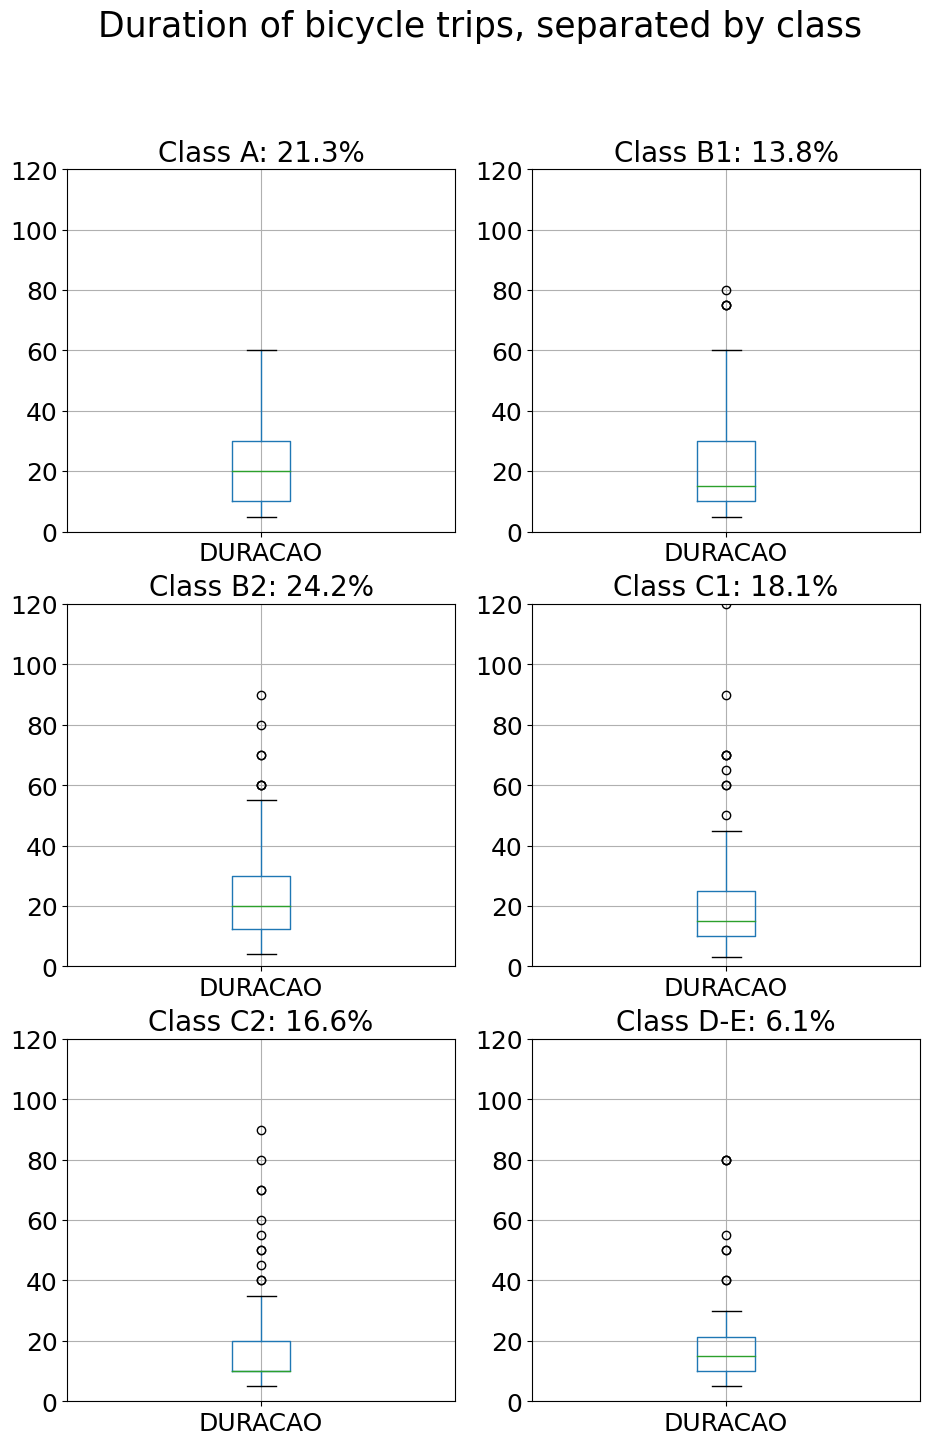

In [59]:
tsa.plot_duration_separated_by_class(bike_trips, duration_column, social_class_column, classes_index_map, bike=True, expansion_factor=False)

In [60]:
data_sp[new_duration_column].mean()

29.867982476800602

In [61]:
bike_trips[new_duration_column].mean()

20.80064308681672

## Bike ownership

In [62]:
bike_ownership_column = 'QT_BICICLE'
df = tsa.calculate_distribution(data_sp, bike_ownership_column, expansion_factor_person)
df

,FE_PESS
QT_BICICLE,
0.0,65.307538
1.0,22.821823
2.0,8.286017
3.0,2.352048
4.0,0.905106
5.0,0.212904
6.0,0.101686
7.0,0.001903
8.0,0.004906


<AxesSubplot:xlabel='QT_BICICLE'>

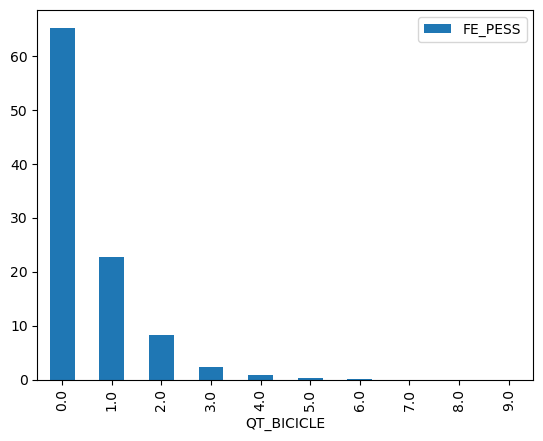

In [63]:
df.plot(kind='bar')

In [64]:
data_sp['HAS_BIKE'] = data_sp['QT_BICICLE'] >= 1
bike_ownership_boolean_column = 'HAS_BIKE'
tsa.calculate_distribution(data_sp, bike_ownership_boolean_column, expansion_factor_person)

,FE_PESS
HAS_BIKE,
False,66.03941
True,33.96059


Conclusion: 1/3 of the households has at least one bike. Still, less than 1% of all the trips are made by bike

In [65]:
tsa.calculate_distribution(data_sp, bike_ownership_boolean_column, expansion_factor=False)

,HAS_BIKE
False,62.294974
True,37.705026


Bike ownership for those who travel by bike

In [66]:
tsa.calculate_distribution(bike_trips, bike_ownership_column, expansion_factor_person)

,FE_PESS
QT_BICICLE,
0.0,7.144373
1.0,61.786178
2.0,19.686270
3.0,4.535064
4.0,5.257115
5.0,0.304423
6.0,0.962514
7.0,0.167312
9.0,0.156751


In [67]:
bike_trips['HAS_BIKE'] = bike_trips['QT_BICICLE'] >= 1
bike_ownership_boolean_column = 'HAS_BIKE'
tsa.calculate_distribution(bike_trips, bike_ownership_boolean_column, expansion_factor_person)

,FE_PESS
HAS_BIKE,
False,7.744154
True,92.255846


The majority of them have bikes.

## Bike parking

In [68]:
bike_parking_column = 'TP_ESBICI'
parking_index_map = {1: 'Bicicletário gratuito', 2:'Bicicletário pago', 
                     3:'Local privado', 4: 'Rua/Local público',
                     5:'Guardador de rua', 6:'Estação de bicicleta',
                     7: 'Paraciclo público', 8: 'Outros'}
tsa.calculate_distribution(data_sp, bike_parking_column, expansion_factor_trip, parking_index_map)

,FE_VIA
TP_ESBICI_new,
Bicicletário gratuito,9.388807
Bicicletário pago,0.820654
Estação de bicicleta,0.597189
Guardador de rua,0.323759
Local privado,76.360162
Outros,7.153120
Paraciclo público,0.065558
Rua/Local público,5.290752


In [69]:
tsa.calculate_distribution(data_sp, bike_parking_column, False, parking_index_map)

,TP_ESBICI_new
Local privado,75.155925
Bicicletário gratuito,8.731809
Outros,6.860707
Rua/Local público,6.340956
Estação de bicicleta,1.247401
Bicicletário pago,0.727651
Paraciclo público,0.519751
Guardador de rua,0.415800
